### Retrieval performance
We compare the performance of the Xception and CLIP ViT models in terms of top-k accuracy.

In [1]:
from dataset import Street2ShopImageSimilarityTestDataset, evaluate_top_k_accuracies
from models.xception import XceptionModel
from models.clip_vit import CLIPViTModel
import random

num_samples = 100
vis_num_samples = 5

/home/shopping-image-search/virtual/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt

# Visualize example results
def plot_retrieval_results(dataset, query_idx, retrieved_indices, num_results=5):
    """
    Plot the query street photo and its top retrieved shop photos
    
    Args:
        dataset: The test dataset instance
        query_idx: Index of the query street photo
        retrieved_indices: List of indices for retrieved shop photos
        num_results: Number of top results to show
    """
    # Get query image
    query_item = dataset.test_dataset[query_idx]
    query_image = query_item['street_photo_image']
    
    # Get retrieved images
    retrieved_images = []
    for idx in retrieved_indices[:num_results]:
        retrieved_item = dataset.test_dataset[idx]
        retrieved_images.append(retrieved_item['shop_photo_image'])
    
    # Create subplot
    fig = plt.figure(figsize=(15, 3))
    
    # Plot query image
    plt.subplot(1, num_results + 1, 1)
    plt.imshow(query_image)
    plt.title('Query\n(Street Photo)')
    plt.axis('off')
    
    # Plot retrieved images
    for i, img in enumerate(retrieved_images, 1):
        plt.subplot(1, num_results + 1, i + 1)
        plt.imshow(img)
        plt.title(f'Top-{i}\n(Shop Photo)')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [3]:
embedding_dim = 512

model = XceptionModel(embedding_dim=embedding_dim)
model.load(f'saved_models/weights/xception-{embedding_dim}.pt')
test_dataset = Street2ShopImageSimilarityTestDataset(model, ratio=0.6)
print(len(test_dataset))
print(test_dataset[0])

# Randomly select indices from the test dataset
query_indices = random.sample(range(len(test_dataset)), num_samples)
vis_indices = random.sample(query_indices, vis_num_samples)

xception_accuracies, xception_visualization_data = evaluate_top_k_accuracies(test_dataset, query_indices, vis_indices)

Initializing xception on device: cuda..


/home/shopping-image-search/virtual/lib/python3.10/site-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(
/home/shopping-image-search/models/base.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full

Model weights loaded from saved_models/weights/xception-512.pt
Loading dataset from street2shop_test_0.6...
Loading FAISS index from s2s_test_0.6_xception512.faiss...
16414
{'street_photo_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3648x5472 at 0x7F3450CB9060>, 'shop_photo_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=913x1304 at 0x7F3450CD1D20>, 'index': 0}


Evaluating top-k accuracies: 100%|██████████| 100/100 [01:00<00:00,  1.66it/s]


Example retrievals from Xception model:
12072 [5031, 843, 8508, 12247, 15104, 2103, 2371, 441, 10375, 9112]


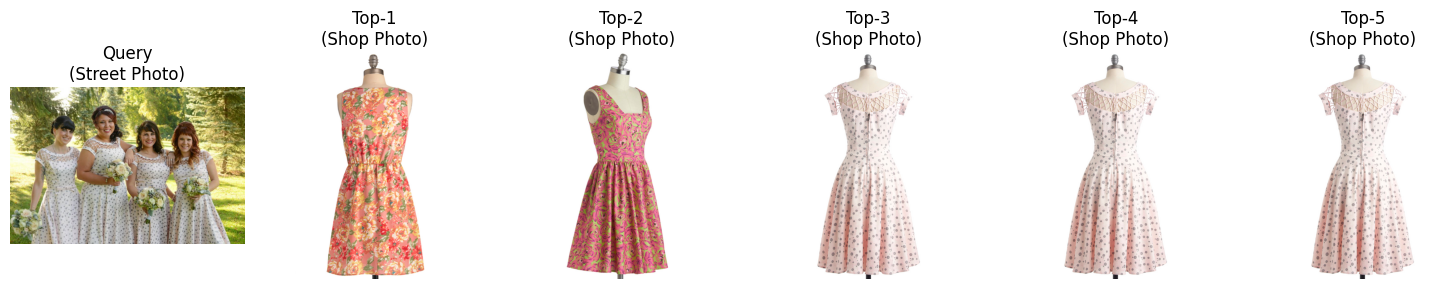

--------------------------------------------------------------------------------
14636 [13627, 8305, 381, 12331, 562, 6072, 3758, 11616, 15962, 327]


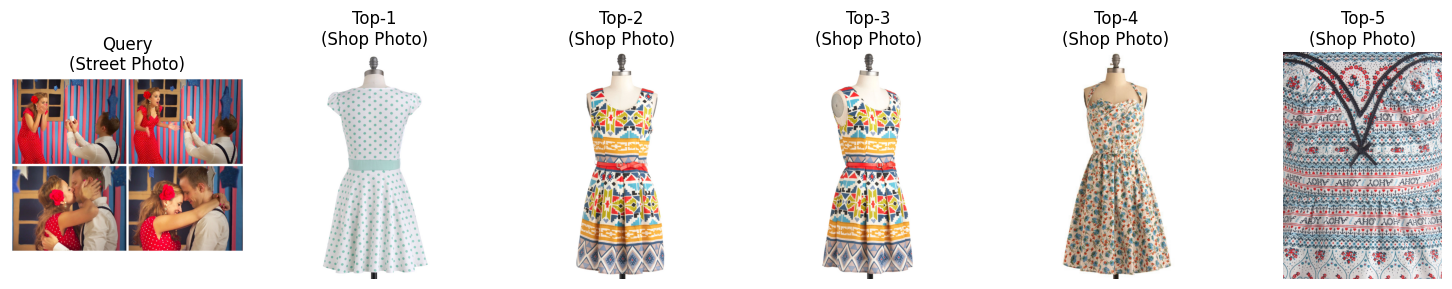

--------------------------------------------------------------------------------
5217 [9125, 7710, 6020, 5069, 15825, 7630, 14432, 4498, 12668, 2209]


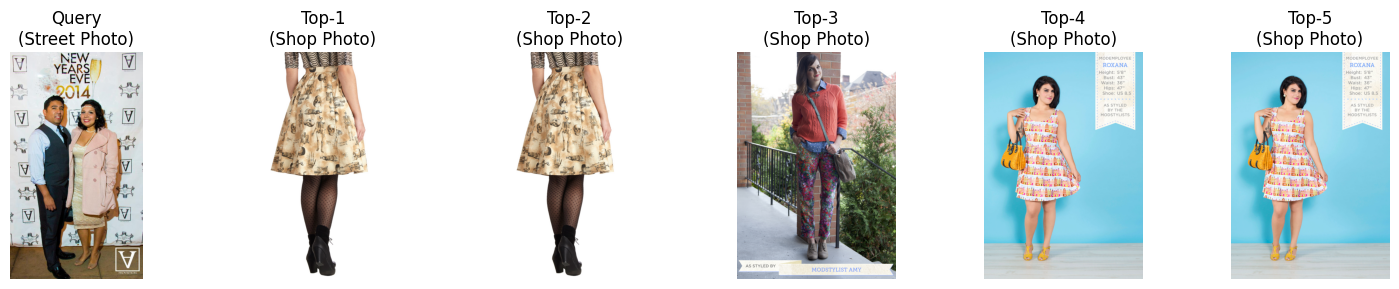

--------------------------------------------------------------------------------


In [4]:
# print(xception_visualization_data)

# Display a few example retrievals
print("Example retrievals from Xception model:")
for query_idx, retrieved_indices in xception_visualization_data[:3]:
    print(query_idx, retrieved_indices)
    plot_retrieval_results(test_dataset, query_idx, retrieved_indices)
    print("-" * 80)

del model, test_dataset, xception_visualization_data

Initializing clip-vit-b-32 on device: cuda..


/home/shopping-image-search/models/clip_vit.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=self.device)


Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Loading dataset from street2shop_test_0.6...
Loading FAISS index from s2s_test_0.6_clip-vit-b-32512.faiss...
16414
{'street_photo_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3648x5472 at 0x7F34503E4970>, 'shop_photo_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=913x1304 at 0x7F34503E4AC0>, 'index': 0}


Evaluating top-k accuracies:  37%|███▋      | 37/100 [00:20<00:30,  2.06it/s]/home/shopping-image-search/virtual/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (99272481 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Evaluating top-k accuracies: 100%|██████████| 100/100 [00:55<00:00,  1.79it/s]



Example retrievals from CLIP ViT model:


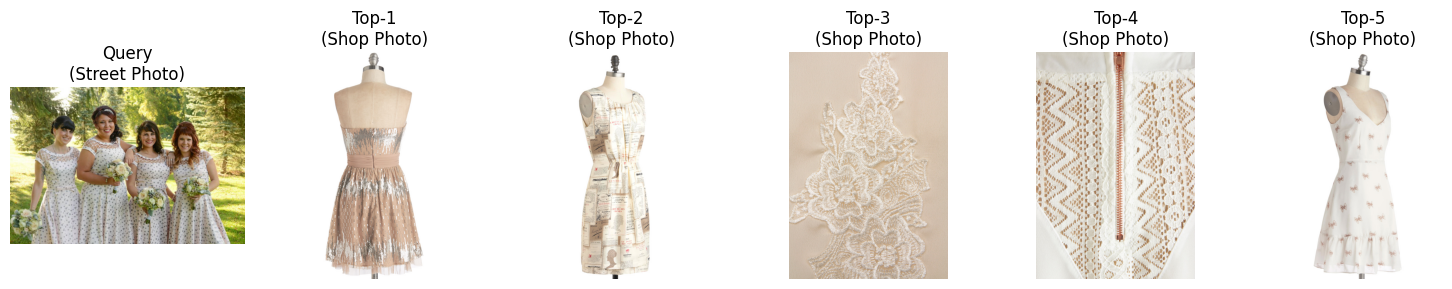

--------------------------------------------------------------------------------


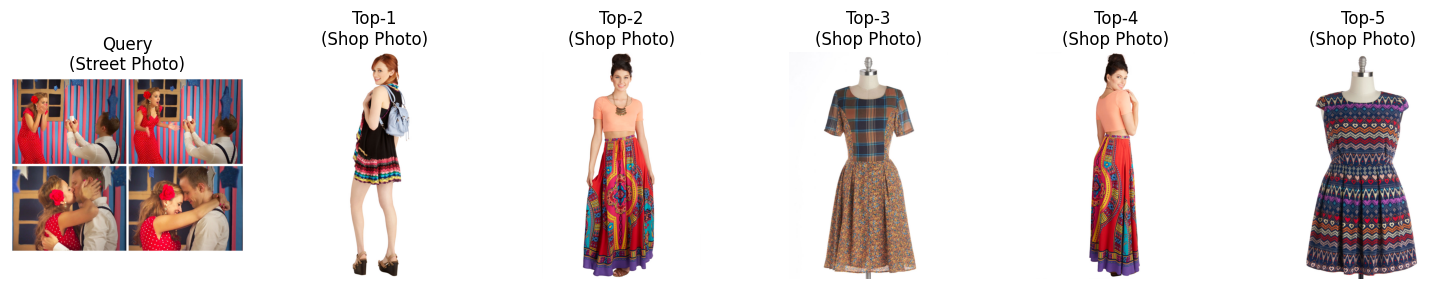

--------------------------------------------------------------------------------


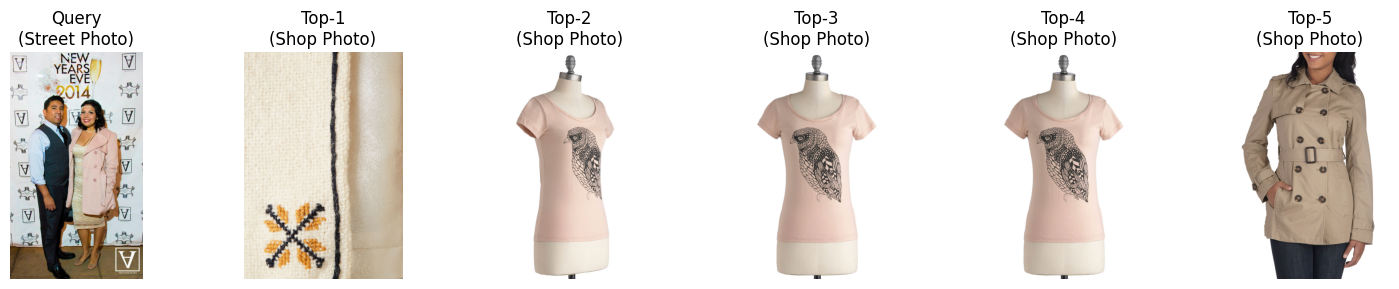

--------------------------------------------------------------------------------


In [5]:
model = CLIPViTModel(embedding_dim=embedding_dim)
model.load(f'saved_models/weights/clip-vit-b-32-{embedding_dim}.pt')
test_dataset = Street2ShopImageSimilarityTestDataset(model, ratio=0.6)
print(len(test_dataset))
print(test_dataset[0])

clipvit_accuracies, clipvit_visualization_data = evaluate_top_k_accuracies(test_dataset, query_indices, vis_indices)

print("\nExample retrievals from CLIP ViT model:")
for query_idx, retrieved_indices in clipvit_visualization_data[:3]:
    plot_retrieval_results(test_dataset, query_idx, retrieved_indices)
    print("-" * 80)
    
# del model, test_dataset, clipvit_visualization_data
del model, clipvit_visualization_data

{'top_1_accuracy': 0.0, 'top_3_accuracy': 0.0, 'top_5_accuracy': 0.0, 'top_10_accuracy': 0.0}
{'top_1_accuracy': 0.0, 'top_3_accuracy': 0.02, 'top_5_accuracy': 0.03, 'top_10_accuracy': 0.05}


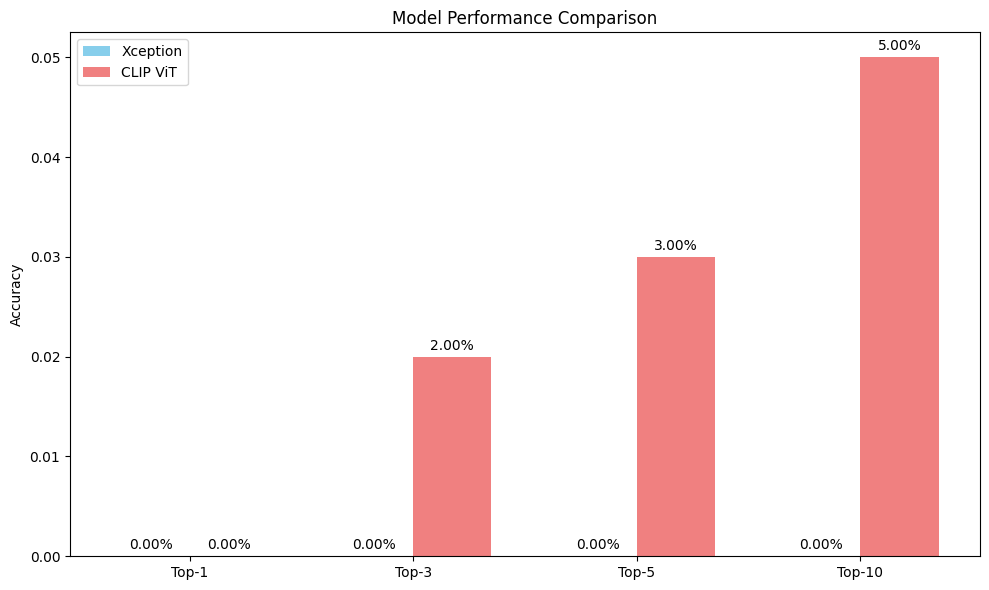

In [6]:
import matplotlib.pyplot as plt
import numpy as np

print(xception_accuracies)
print(clipvit_accuracies)

# Extract accuracy values
metrics = ['top_1_accuracy', 'top_3_accuracy', 'top_5_accuracy', 'top_10_accuracy']
xception_values = [xception_accuracies[m] for m in metrics]
clipvit_values = [clipvit_accuracies[m] for m in metrics]

# Set up bar positions
x = np.arange(len(metrics))
width = 0.35  # Width of bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
rects1 = ax.bar(x - width/2, xception_values, width, label='Xception', color='skyblue')
rects2 = ax.bar(x + width/2, clipvit_values, width, label='CLIP ViT', color='lightcoral')

# Customize plot
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['Top-1', 'Top-3', 'Top-5', 'Top-10'])
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

### Pipeline to enhance retrieval performance
Now we will build a pipeline to enhance the retrieval performance. Inspired by Pinterest image search pipeline.

In [7]:
import json
import torch
from tqdm import tqdm
import torchvision.transforms as transforms
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from sentence_transformers import SentenceTransformer
import faiss
import time
import gc

from dataset import Street2ShopImageSimilarityTestDataset

test_dataset = Street2ShopImageSimilarityTestDataset(ratio=0.6)
resize_transform = transforms.Resize((224, 224))

def shop_transform(image):
    if not image.mode == "RGB":
        image = image.convert("RGB")
    return resize_transform(image)

# Apply the transformation to each image in the dataset
shop_images = [shop_transform(item['shop_photo_image']) for item in tqdm(test_dataset.test_dataset, desc="Loading shop images")]

del test_dataset
gc.collect()

print(shop_images[0])

Loading dataset from street2shop_test_0.6...


Loading shop images:  78%|███████▊  | 12827/16414 [10:24<04:12, 14.19it/s]/home/shopping-image-search/virtual/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (99272481 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Loading shop images: 100%|██████████| 16414/16414 [13:39<00:00, 20.02it/s]

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F3450C97B80>


In [8]:
# # ------------------------- ⚡ OPTIMIZATIONS ⚡ ------------------------- #
# device = "cuda" if torch.cuda.is_available() else "cpu"
# dtype = torch.float16  # Use mixed precision for speed

# blip_processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
# blip_model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=dtype, device_map=device)
# print("BLIP-2 model and processor loaded successfully.")

# def get_text_caption(images):
#     # Ensure images is a list of PIL Image objects
#     if not isinstance(images, list):
#         images = [images]
    
#     # Process the batch of images
#     inputs = blip_processor(images=images, return_tensors="pt").to(device, dtype=dtype)
    
#     try:
#         # Generate captions
#         caption_ids = blip_model.generate(**inputs)
#         captions = blip_processor.batch_decode(caption_ids, skip_special_tokens=True)
#     except Exception as e:
#         print(f"Error generating captions: {e}")
#         return None
    
#     # Return single caption if input was a single image, otherwise return list
#     return captions[0] if len(captions) == 1 else captions

# def generate_captions_batch(images, batch_size=32):
#     """Generate captions for a list of image paths in batches"""
#     captions = []
    
#     # Process in batches
#     for i in tqdm(range(0, len(images), batch_size)):
#         batch_images = images[i:i + batch_size]
        
#         # Get captions for batch
#         batch_captions = get_text_caption(batch_images)
#         captions.extend(batch_captions)
        
#     return captions

# captions = generate_captions_batch(shop_images)
# print(f"Saving captions to captions.json")
# with open("captions.json", "w") as f:
#     json.dump(captions, f)
# print(f"Captions saved to captions.json")

# del blip_processor, blip_model
# gc.collect()
# torch.cuda.empty_cache()  # Free up CUDA memory

In [9]:
# import numpy as np

# batch_size = 32
# feature_extractor = SentenceTransformer("all-MiniLM-L6-v2").to(device)

# start_time = time.time()
# index = faiss.IndexHNSWFlat(feature_extractor.get_sentence_embedding_dimension(), 32)  # HNSW index for inner product (cosine similarity), 32 is the number of neighbors in the graph
# print(f"Index creation time: {time.time() - start_time:.2f} seconds")

# # Encode captions in batches
# for start_idx in tqdm(range(0, len(captions), batch_size), desc="Indexing captions"):
#     end_idx = min(start_idx + batch_size, len(captions))
#     batch_items = captions[start_idx:end_idx]
    
#     with torch.no_grad():
#         features = feature_extractor.encode(batch_items, convert_to_tensor=True).cpu().numpy()
    
#     # Normalize the features for cosine similarity
#     faiss.normalize_L2(np.ascontiguousarray(features.astype(np.float32)))
    
#     index.add(features)

# # Save index
# print("Saving FAISS index...")
# faiss.write_index(index, "caption_embeddings.faiss")
# print(f"Index saved to caption_embeddings.faiss")

# del feature_extractor
# gc.collect()
# torch.cuda.empty_cache()

In [32]:
import torch
from torchvision import transforms
from transformers import MobileViTForImageClassification, MobileViTFeatureExtractor, Blip2Processor, Blip2ForConditionalGeneration
import faiss
from sentence_transformers import SentenceTransformer
from ultralytics import YOLO
from models.xception import XceptionModel


img_index = faiss.read_index("s2s_test_0.6_clip-vit-b-32512.faiss") # clip-vit-b-32 index, fp32
captions_index = faiss.read_index("caption_embeddings.faiss") # miniLM index, fp32


device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16  # Mixed Precision for Faster Inference


def cleanup(*obj):
    for o in obj:
        del o
    gc.collect()
    torch.cuda.empty_cache()


query_img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


def multi_stage_retrieval(query_image):
    # get crops
    yolo_model = YOLO("yolov8s.pt").to(device)
    results = yolo_model(query_image)[0]  # Get first result
    crops = []
    for box in results.boxes.xyxy:  # Access bounding boxes correctly
        x1, y1, x2, y2 = box.cpu().numpy()  # Convert tensor to numpy
        crops.append(query_image.crop((int(x1), int(y1), int(x2), int(y2))))
    cleanup(yolo_model)
    print(f"Got {len(crops)} crops..")
    
    # Stage 1: Extract Query Embeddings (Xception + BLIP caption + MiniLM text embedding) in batches
    # xception_model = XceptionModel(embedding_dim=512, device=device)
    # xception_model.load(f'saved_models/weights/xception-512.pt')
    
    retriever_model = CLIPViTModel(embedding_dim=512, device=device)
    retriever_model.load(f'saved_models/weights/clip-vit-b-32-512.pt')
    crops_batch = torch.stack([query_img_transform(crop) for crop in crops]).to(device)
    img_embeds = retriever_model(crops_batch)
    
    cleanup(retriever_model, crops_batch)
    print(f"Got {len(img_embeds)} image embeddings..")
    
    blip_processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
    blip_model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=dtype, device_map=device)
    batch_inputs = blip_processor(images=crops, return_tensors="pt").to(device, dtype=dtype)
    caption_ids = blip_model.generate(**batch_inputs)
    captions = blip_processor.batch_decode(caption_ids, skip_special_tokens=True)
    cleanup(blip_processor, blip_model, batch_inputs, caption_ids)
    print(f"Got {len(captions)} text captions..")
    
    minilm_model = SentenceTransformer("all-MiniLM-L6-v2").to(device)
    text_embeds = minilm_model.encode(captions, convert_to_tensor=True)
    cleanup(minilm_model)
    print(f"Got {len(text_embeds)} text embeddings..")
    
    # Stage 2: Coarse Filtering using FAISS
    query_features = img_embeds.detach().cpu().numpy()
    if not retriever_model.normalization:
        faiss.normalize_L2(query_features)
    topk_image_distances, topk_image_indices = img_index.search(query_features, k=20)  # Retrieve top 20 candidates for images
    
    # Stage 3: Re-Ranking with MiniLM (Text-Aware)
    combined_scores = []
    for idx, candidates in enumerate(topk_image_indices):
        text_query = text_embeds[idx].detach().cpu().numpy()
        faiss.normalize_L2(text_query.reshape(1, -1))  # Normalize the query
        text_distances, topk_text_indices = captions_index.search(text_query.reshape(1, -1), k=len(candidates))
        
        # Combine image and text distances
        for i, candidate in enumerate(candidates):
            image_distance = topk_image_distances[idx][i]  # Get the distance from FAISS image search results
            text_distance = text_distances[0][i]
            combined_score = 0.5 * image_distance + 0.5 * text_distance  # Example weighting
            combined_scores.append((combined_score, candidate))
    
    # Sort by combined score
    combined_scores.sort(key=lambda x: x[0])
    
    # Extract sorted indices
    final_ranked_indices = [idx for _, idx in combined_scores]
    return final_ranked_indices

def rerank_with_mobilevit(query_image, global_idx, shop_candidates):
    mobilevit = MobileViTForImageClassification.from_pretrained("apple/mobilevit-small").to(device, dtype=dtype)
    feature_extractor = MobileViTFeatureExtractor.from_pretrained("apple/mobilevit-small")
    
    inputs = feature_extractor(images=[query_image] + shop_candidates, return_tensors="pt").to(device, dtype=dtype)

    # Get embeddings
    with torch.no_grad():
        outputs = mobilevit(**inputs).logits  # Extract pooled output

    query_embedding = outputs[0]
    shop_embeddings = outputs[1:]

    # Compute cosine similarity
    scores = torch.mm(query_embedding.unsqueeze(0), shop_embeddings.T)
    print("\nscores: ", scores)

    # Sort results by similarity
    sorted_indices = scores.argsort(descending=True).squeeze().tolist()  # Convert to list of integers
    print("\nsorted_indices: ", sorted_indices)
    
    output_indices = [global_idx[idx] for idx in sorted_indices]
    
    if isinstance(output_indices, list):
        return output_indices  # Indices of shop_candidates in descending order of similarity
    else:
        return [output_indices]


def run_fashion_search(query_image):
    if query_image.mode != "RGB":
        query_image = query_image.convert("RGB")

    # Multi-Stage Retrieval
    candidates = multi_stage_retrieval(query_image)
    
    # return candidates
    
    # Re-Ranking
    reranked_top20 = rerank_with_mobilevit(query_image, candidates, [shop_images[idx] for idx in candidates[:20]])
    
    return reranked_top20 + candidates[20:]



### Evaluation of pipeline

In [33]:
import random
import matplotlib.pyplot as plt

test_dataset = Street2ShopImageSimilarityTestDataset(ratio=0.6)

def evaluate_top_k_accuracies(dataset, query_indices, vis_indices, k=10):
    
    top_1_count = 0
    top_3_count = 0
    top_5_count = 0
    top_10_count = 0
    
    vis_results = []
    
    for idx in tqdm(query_indices, desc="Evaluating pipeline on query indices"):
        # Get the street photo and its true category
        item = dataset.test_dataset[idx]
        street_photo = item['street_photo_image']
        true_idx = item['index']
        
        # Perform the search
        retrieved_indices = run_fashion_search(street_photo)
        print("\nretrieved_indices: ", retrieved_indices)
        
        if idx in vis_indices:
            vis_results.append((idx, retrieved_indices))
        
        # Check if the true category is in the top-k results
        for position, retrieved_idx in enumerate(retrieved_indices):  # retrieved_indices is a 2D array
            retrieved_idx = int(retrieved_idx)
            retrieved_item = dataset.test_dataset[retrieved_idx]
            if retrieved_item['index'] == true_idx:
                if position == 0:
                    top_1_count += 1
                if position < 3:
                    top_3_count += 1
                if position < 5:
                    top_5_count += 1
                if position < 10:
                    top_10_count += 1
                break  # Stop checking once the correct category is found
        
        print("#"*100)
    
    accuracies = {
        'top_1_accuracy': top_1_count / len(query_indices),
        'top_3_accuracy': top_3_count / len(query_indices),
        'top_5_accuracy': top_5_count / len(query_indices),
        'top_10_accuracy': top_10_count / len(query_indices)
    }
    
    return accuracies, vis_results

# Visualize example results
def plot_retrieval_results(dataset, query_idx, retrieved_indices, num_results=5):
    """
    Plot the query street photo and its top retrieved shop photos
    
    Args:
        dataset: The test dataset instance
        query_idx: Index of the query street photo
        retrieved_indices: List of indices for retrieved shop photos
        num_results: Number of top results to show
    """
    # Get query image
    query_item = dataset.test_dataset[query_idx]
    query_image = query_item['street_photo_image']
    
    # Get retrieved images
    retrieved_images = []
    for idx in retrieved_indices[:num_results]:
        idx = int(idx)
        retrieved_item = dataset.test_dataset[idx]
        retrieved_images.append(retrieved_item['shop_photo_image'])
    
    # Create subplot
    fig = plt.figure(figsize=(15, 3))
    
    # Plot query image
    plt.subplot(1, num_results + 1, 1)
    plt.imshow(query_image)
    plt.title('Query\n(Street Photo)')
    plt.axis('off')
    
    # Plot retrieved images
    for i, img in enumerate(retrieved_images, 1):
        plt.subplot(1, num_results + 1, i + 1)
        plt.imshow(img)
        plt.title(f'Top-{i}\n(Shop Photo)')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

pipeline_accuracies, pipeline_visualization_data = evaluate_top_k_accuracies(test_dataset, query_indices, vis_indices)

Loading dataset from street2shop_test_0.6...


Evaluating pipeline on query indices:   0%|          | 0/100 [00:00<?, ?it/s]


0: 640x448 1 person, 6.6ms
Speed: 1.7ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]


Got 1 text captions..
Got 1 text embeddings..


/home/shopping-image-search/virtual/lib/python3.10/site-packages/transformers/models/mobilevit/feature_extraction_mobilevit.py:28: FutureWarning: The class MobileViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MobileViTImageProcessor instead.
  warnings.warn(



scores:  tensor([[660.0000, 660.0000, 652.0000, 667.0000, 709.5000, 730.5000, 537.0000, 648.5000, 648.5000, 663.0000, 437.0000, 437.0000, 437.0000, 437.0000, 437.0000, 437.0000, 437.0000, 437.0000, 437.0000, 656.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [5, 4, 3, 9, 0, 1, 19, 2, 8, 7, 6, 16, 14, 15, 17, 18, 13, 12, 11, 10]

retrieved_indices:  [16019, 164, 15303, 6111, 16269, 875, 4008, 10374, 8041, 12889, 11735, 12532, 14518, 13348, 2424, 1633, 7881, 4881, 3364, 13384]


Evaluating pipeline on query indices:   1%|          | 1/100 [00:16<27:12, 16.49s/it]

####################################################################################################

0: 640x416 1 person, 1 skateboard, 6.8ms
Speed: 1.9ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  912.5000,   625.0000,   421.2500,   813.5000,  1195.0000, -1222.0000, -1222.0000, -1222.0000,   596.5000,    84.6875,  1397.0000,    61.8125,   828.0000,   -67.3125,  -352.7500,  -352.7500,   671.0000,  1100.0000,  -417.7500,  -417.7500]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [10, 4, 17, 0, 12, 3, 16, 1, 8, 2, 9, 11, 13, 15, 14, 19, 18, 5, 6, 7]

retrieved_indices:  [1253, 7378, 16225, 10332, 838, 13433, 13067, 5125, 8577, 2608, 14217, 13772, 3421, 8777, 13839, 2850, 6498, 9076, 1971, 2707, 1169, 7485, 7700, 401, 2934, 841, 10499, 15998, 8113, 5699, 8397, 2158, 281, 5727, 2106, 8425, 8369, 14300, 12528, 9439]


Evaluating pipeline on query indices:   2%|▏         | 2/100 [00:32<26:40, 16.33s/it]

####################################################################################################

0: 640x480 1 person, 6.9ms
Speed: 2.3ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ 673.5000, 4058.0000,   -5.8750,   -5.8750, 1869.0000, 1869.0000, 4002.0000, 4002.0000,  -20.2188, -176.7500, -825.5000,  794.5000,  943.0000,  943.0000, 3580.0000, 3580.0000, 3580.0000, 3580.0000, 3580.0000, 3580.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 7, 6, 19, 15, 18, 16, 17, 14, 4, 5, 12, 13, 11, 0, 2, 3, 8, 9, 10]

retrieved_indices:  [765, 310, 1393, 507, 6991, 6402, 7817, 2729, 1406, 12189, 9216, 7803, 3748, 16047, 8162, 1939, 11342, 3520, 14600, 4090]


Evaluating pipeline on query indices:   3%|▎         | 3/100 [00:47<25:24, 15.72s/it]

####################################################################################################

0: 448x640 4 persons, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Got 4 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 4 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]


Got 4 text captions..
Got 4 text embeddings..

scores:  tensor([[1840.0000, 1840.0000,  965.5000,  965.5000,  162.1250,  162.1250, -608.0000, 2158.0000,  692.5000,  692.5000, 1876.0000, -680.0000, 2072.0000, 2072.0000,  721.5000,  162.1250,  162.1250,   90.7500,   90.7500,   90.7500]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 12, 13, 10, 1, 0, 2, 3, 14, 9, 8, 16, 5, 15, 4, 17, 18, 19, 6, 11]

retrieved_indices:  [14021, 12929, 16350, 12738, 2134, 7471, 15779, 16201, 12618, 16356, 12258, 2612, 2612, 7804, 7804, 7673, 2545, 283, 11885, 14987, 15439, 2468, 7510, 14021, 11228, 14680, 15712, 1593, 8519, 1451, 3549, 10595, 2134, 7471, 2342, 9393, 11212, 12775, 2407, 14987, 2836, 1738, 10802, 7707, 8256, 6500, 860, 4145, 5173, 12618, 13737, 10028, 10418, 14116, 309, 11979, 8904, 1727, 7971, 3549, 6539, 10888, 6204, 1961, 13052, 2468, 283, 2545, 4666, 12680, 11003, 4256, 7673, 15439, 7510, 16283, 3493, 6263, 2992, 15921]


Evaluating pipeline on query indices:   4%|▍         | 4/100 [01:04<26:07, 16.33s/it]

####################################################################################################

0: 640x416 1 person, 6.2ms
Speed: 1.5ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[  648.5000,   648.5000,   648.5000, -1155.0000, -1155.0000,   -49.4688,   -49.4688,   880.5000,  1649.0000,  1649.0000,  1649.0000,   787.5000,  -915.0000,  -915.0000,  -212.2500,   203.0000,   185.3750, -1587.0000,  -524.0000,  1935.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 10, 8, 9, 7, 11, 2, 0, 1, 15, 16, 5, 6, 14, 18, 12, 13, 4, 3, 17]

retrieved_indices:  [6826, 3756, 774, 15437, 311, 9429, 1826, 10145, 6542, 9248, 3037, 15254, 7102, 15966, 10098, 11663, 8391, 15675, 7250, 8001]


Evaluating pipeline on query indices:   5%|▌         | 5/100 [01:19<24:48, 15.67s/it]

####################################################################################################

0: 640x640 3 persons, 5.9ms
Speed: 2.6ms preprocess, 5.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[ -306.0000,  -306.0000,  -306.0000,  -306.0000,  -512.5000,  -512.5000,   394.0000,   394.0000,  -173.3750,   316.5000,   848.5000,  -236.8750,  -236.8750,  -126.0625,   386.7500,  -937.0000, -1023.0000,   195.2500,  1018.0000,  1018.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 18, 10, 7, 6, 14, 9, 17, 13, 8, 11, 12, 1, 3, 2, 0, 4, 5, 15, 16]

retrieved_indices:  [13065, 11461, 8785, 10248, 224, 1763, 9551, 7886, 13886, 2797, 2567, 4078, 11967, 14147, 3015, 11318, 13323, 10274, 8233, 8522, 15661, 4326, 10799, 2822, 15147, 9537, 15843, 7194, 3568, 1778, 9421, 7071, 5320, 8352, 1065, 16400, 8424, 10402, 5326, 11315, 14147, 11967, 3015, 11318, 15147, 4326, 10799, 2822, 15661, 13323, 10274, 8352, 13386, 5918, 4185, 16400, 9421, 5320, 9537, 15843]


Evaluating pipeline on query indices:   6%|▌         | 6/100 [01:35<24:50, 15.86s/it]

####################################################################################################

0: 640x480 2 persons, 7 cars, 6.1ms
Speed: 1.6ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Got 9 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 9 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]


Got 9 text captions..
Got 9 text embeddings..

scores:  tensor([[ 764.5000,  764.5000,  764.5000,  764.5000,  764.5000,   48.6875, -214.3750,  -76.9375,  256.2500, -214.0000,  521.0000,  162.3750,  162.3750,  764.5000,  764.5000,  314.5000,  184.5000,   86.3125,  -98.4375,  394.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 4, 2, 3, 13, 0, 14, 10, 19, 15, 8, 16, 11, 12, 17, 5, 7, 18, 9, 6]

retrieved_indices:  [8006, 8077, 5393, 8649, 466, 8213, 1892, 13412, 15354, 7495, 11916, 12082, 7760, 6857, 4818, 10708, 10742, 12690, 7272, 10119, 4198, 5647, 8284, 7590, 5710, 9910, 7207, 11871, 5476, 8465, 7402, 14999, 8043, 5179, 4875, 7498, 14305, 619, 4809, 580, 12152, 15596, 1391, 4627, 15190, 4242, 8142, 8828, 10772, 1417, 6152, 11148, 15404, 14112, 13122, 740, 8911, 13456, 1232, 6621, 703, 12804, 419, 12916, 15606, 4033, 7236, 8929, 5981, 14269, 12632, 16129, 13432, 5486, 11350, 12469, 7204, 483, 2795, 6710, 4035, 11281, 16409, 1947, 278, 12422, 11100, 2546, 15240, 1000

Evaluating pipeline on query indices:   7%|▋         | 7/100 [01:54<25:54, 16.72s/it]

####################################################################################################

0: 640x448 1 person, 2 backpacks, 1 handbag, 2 surfboards, 6.3ms
Speed: 2.5ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
Got 6 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 6 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]


Got 6 text captions..
Got 6 text embeddings..

scores:  tensor([[528.0000, 528.0000, 528.0000, 543.5000, 543.5000, 303.5000, 303.5000, 528.0000, 417.7500, 528.0000, 528.0000, 264.7500, 352.7500, 238.7500, 299.5000, 299.5000, 299.5000, 474.5000, 474.5000, 474.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [4, 3, 1, 0, 10, 9, 2, 7, 17, 19, 18, 8, 12, 6, 5, 16, 15, 14, 11, 13]

retrieved_indices:  [4357, 11995, 7544, 989, 14774, 15613, 5967, 540, 3680, 12900, 980, 5295, 7159, 2784, 3321, 5587, 698, 7123, 9350, 9183, 7663, 9845, 5471, 7220, 5236, 4179, 13543, 4345, 2979, 785, 11513, 7980, 15208, 989, 14774, 540, 5967, 7544, 15613, 11324, 2030, 1535, 12900, 9845, 7663, 3680, 980, 9340, 6050, 7159, 9350, 7386, 10455, 9021, 14120, 4160, 9933, 5587, 5434, 12685, 12456, 7123, 7316, 11950, 7078, 14723, 3135, 9256, 1827, 1061, 2536, 257, 11242, 15350, 13419, 3727, 10788, 14585, 9936, 1578, 1339, 2697, 3484, 14234, 5295, 13543, 4179, 14120, 7980, 11513, 15208, 4345, 11950, 14723, 

Evaluating pipeline on query indices:   8%|▊         | 8/100 [02:11<25:49, 16.84s/it]

####################################################################################################

0: 640x448 1 person, 6.3ms
Speed: 2.2ms preprocess, 6.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ -514.5000,  -514.5000,  -514.5000,  -354.0000,  -354.0000,  -354.0000,   -81.4375,   -81.4375,   -81.4375,   -81.4375,   -81.4375,   670.0000, -1273.0000, -1273.0000, -1273.0000,   819.5000,  -808.5000,  -808.5000,   514.5000,   134.6250]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [15, 11, 18, 19, 8, 10, 7, 9, 6, 4, 3, 5, 2, 1, 0, 16, 17, 13, 14, 12]

retrieved_indices:  [15474, 5848, 14051, 10216, 609, 1645, 93, 10328, 9559, 9848, 12768, 7977, 3054, 14190, 14512, 14562, 12271, 3681, 3214, 12866]


Evaluating pipeline on query indices:   9%|▉         | 9/100 [02:26<24:38, 16.24s/it]

####################################################################################################

0: 640x384 3 persons, 6.6ms
Speed: 2.1ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[ 5660.0000,  5660.0000, -1577.0000,  -395.0000,  -395.0000,  -395.0000, -1663.0000, -1663.0000, -1667.0000, -1667.0000, -1667.0000, -1667.0000, -1667.0000, -1667.0000,  -391.2500,  -391.2500,  -391.2500,  3372.0000,  3372.0000,  3372.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 0, 17, 19, 18, 15, 14, 16, 4, 3, 5, 2, 7, 6, 13, 12, 11, 10, 8, 9]

retrieved_indices:  [2795, 483, 15086, 16274, 9483, 8624, 12373, 6363, 15578, 4805, 11288, 2166, 399, 399, 10016, 2148, 7962, 124, 9331, 9665, 6577, 11703, 10119, 1232, 10326, 4350, 4216, 6222, 1004, 6222, 1642, 6252, 16222, 1477, 7295, 12576, 4707, 7484, 11630, 4350, 4216, 15361, 12872, 8554, 7356, 3477, 5375, 1004, 9445, 11829, 13219, 1642, 6252, 15086, 11703, 9483, 16274, 6577, 232, 2324]


Evaluating pipeline on query indices:  10%|█         | 10/100 [02:41<23:59, 15.99s/it]

####################################################################################################

0: 512x640 2 persons, 1 handbag, 7.6ms
Speed: 2.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[ 1468.,  2740.,  2740.,  2740.,  2740.,  2740.,  -758., -1538., -1538.,  -758.,  -758., -3202.,  -846.,  -846.,  -846.,  -846., -4688., -1538.,  1139., -1538.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 5, 2, 4, 3, 0, 18, 9, 10, 6, 12, 15, 14, 13, 17, 19, 7, 8, 11, 16]

retrieved_indices:  [15861, 4182, 1991, 2937, 13139, 9210, 15787, 2001, 1840, 4062, 16178, 6250, 40, 14195, 15645, 11126, 13694, 13714, 13283, 10900, 2682, 11142, 7543, 10142, 5353, 2945, 4228, 12119, 10032, 4685, 998, 12144, 15123, 12386, 8637, 16174, 4102, 9408, 8432, 7951, 7902, 10077, 12294, 807, 13133, 10784, 7479, 9521, 11180, 5758, 5053, 7115, 10682, 5734, 8732, 14527, 7543, 2242, 1003, 10908]


Evaluating pipeline on query indices:  11%|█         | 11/100 [03:00<25:04, 16.90s/it]

####################################################################################################

0: 640x448 1 person, 6.1ms
Speed: 1.6ms preprocess, 6.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[-198.3750, -198.3750,  118.5000, 1101.0000, 1101.0000,  100.0625,  950.0000,  529.5000,  529.5000,  435.0000,  415.2500,  415.2500,  415.2500,  544.5000,  544.5000,  544.5000,  359.7500, -176.7500, 1176.0000,   48.0938]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [18, 3, 4, 6, 15, 13, 14, 7, 8, 9, 11, 10, 12, 16, 2, 5, 19, 17, 1, 0]

retrieved_indices:  [1654, 8060, 7373, 3558, 2232, 13951, 14262, 6982, 172, 7839, 12173, 5503, 1921, 14678, 16402, 1394, 36, 6132, 11266, 3962]


Evaluating pipeline on query indices:  12%|█▏        | 12/100 [03:16<24:12, 16.51s/it]

####################################################################################################

0: 640x640 2 persons, 5.4ms
Speed: 1.1ms preprocess, 5.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[ 1462.0000, -3604.0000,  4324.0000, -4360.0000, -4360.0000, -4360.0000, -4360.0000,   648.5000,  -248.6250,  1066.0000,  1066.0000,  2156.0000, -5632.0000,  7624.0000,  7624.0000,  7624.0000,   648.5000,  -984.0000,  2262.0000, -3446.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [14, 13, 15, 2, 18, 11, 0, 10, 9, 16, 7, 8, 17, 19, 1, 3, 4, 6, 5, 12]

retrieved_indices:  [7972, 13575, 951, 7543, 11416, 14527, 16094, 13461, 5881, 6618, 11619, 4102, 8637, 14809, 15262, 10900, 12144, 12386, 15123, 8910, 4590, 3905, 12640, 16281, 14218, 14863, 3865, 5202, 11695, 16322, 11280, 3740, 6467, 14462, 14776, 12198, 4675, 2532, 7274, 14148]


Evaluating pipeline on query indices:  13%|█▎        | 13/100 [03:32<23:50, 16.44s/it]

####################################################################################################

0: 640x448 1 person, 1 couch, 6.3ms
Speed: 1.7ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[ 5920.0000,  -452.7500,  -765.5000,  -765.5000,  1558.0000,  1558.0000,  1558.0000,  1435.0000,  3478.0000, -1011.5000, -1011.5000,    23.7812,  1524.0000,  5704.0000,  5704.0000,  3478.0000,   749.0000,   749.0000,  1043.0000,  3580.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [0, 14, 13, 19, 15, 8, 5, 6, 4, 12, 7, 18, 16, 17, 11, 1, 2, 3, 9, 10]

retrieved_indices:  [618, 5407, 13626, 12796, 7772, 7882, 4424, 669, 3196, 13062, 4164, 10339, 8321, 10373, 10143, 4552, 7252, 7611, 11293, 7079, 13965, 15913, 15666, 6874, 7207, 11871, 3982, 13855, 5566, 1733, 12024, 14923, 3228, 308, 1932, 7049, 8664, 3581, 4585, 7495]


Evaluating pipeline on query indices:  14%|█▍        | 14/100 [03:48<23:25, 16.34s/it]

####################################################################################################

0: 640x448 1 person, 1 handbag, 6.3ms
Speed: 1.5ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  23.7031,  402.7500,  402.7500, -369.2500,  456.5000,  613.5000,  388.2500,  388.2500,  388.2500,  388.2500, -284.5000, -284.5000, -284.5000, -284.5000, -284.5000, -284.5000, -114.3125, -114.3125, -114.3125, -114.3125]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [5, 4, 1, 2, 7, 6, 8, 9, 0, 19, 16, 18, 17, 14, 10, 15, 11, 13, 12, 3]

retrieved_indices:  [1065, 16052, 15916, 14768, 8069, 3179, 3358, 5637, 10612, 11318, 11967, 14147, 3015, 15843, 9537, 7071, 9421, 5320, 7194, 13573, 12401, 13979, 1059, 11668, 9008, 3188, 8984, 15864, 1310, 9612, 9615, 15652, 176, 5105, 6985, 15005, 14801, 8435, 12381, 9103]


Evaluating pipeline on query indices:  15%|█▌        | 15/100 [04:04<22:48, 16.10s/it]

####################################################################################################

0: 640x480 2 persons, 6.6ms
Speed: 2.7ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[1024.0000, 1024.0000, 1024.0000, 1633.0000, 1633.0000,  922.5000, 1136.0000, 1136.0000,   34.5000,   34.5000,   34.5000,   34.5000,   34.5000,   34.5000, 1024.0000, 1024.0000, 1024.0000,   38.0938,  -19.5312,  -19.5312]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [4, 3, 6, 7, 16, 0, 14, 15, 1, 2, 5, 17, 13, 12, 8, 9, 11, 10, 19, 18]

retrieved_indices:  [12740, 4642, 8752, 16270, 11288, 7508, 4805, 15578, 15164, 3170, 5109, 7028, 8554, 6363, 8624, 12373, 12872, 7356, 14620, 3809, 10496, 5068, 12776, 10979, 5902, 13012, 7019, 1898, 6491, 16178, 14195, 6250, 40, 10062, 856, 11462, 3429, 13827, 12312, 11019]


Evaluating pipeline on query indices:  16%|█▌        | 16/100 [04:19<22:17, 15.92s/it]

####################################################################################################

0: 640x640 1 person, 2 ties, 2 couchs, 1 dining table, 5.4ms
Speed: 1.1ms preprocess, 5.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 6 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 6 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Got 6 text captions..
Got 6 text embeddings..

scores:  tensor([[ 720.0000,  720.0000, 1006.5000, 1006.5000,  763.0000,  763.0000,  763.0000,  763.0000,  763.0000,  763.0000,  763.0000,  763.0000,  763.0000,  763.0000,  763.0000,  763.0000,  763.0000,  787.5000,  787.5000,  787.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [2, 3, 17, 19, 18, 5, 4, 16, 13, 12, 8, 9, 14, 15, 7, 6, 11, 10, 1, 0]

retrieved_indices:  [14839, 12277, 5330, 14538, 10914, 11546, 3451, 14059, 1134, 12220, 1081, 15225, 16329, 14977, 7011, 178, 12262, 9326, 10238, 6683, 1150, 13760, 16085, 436, 7431, 2497, 7432, 8915, 14212, 3061, 7427, 16257, 12312, 9473, 16395, 8040, 5207, 3077, 133, 9434, 10614, 11144, 12058, 3730, 8555, 7563, 13918, 13639, 2833, 13104, 11792, 3590, 5546, 9955, 9607, 6760, 2815, 2598, 2647, 125, 15333, 1025, 393, 4114, 13763, 16395, 125, 2815, 9607, 8040, 4114, 11792, 10055, 10975, 13239, 13104, 1025, 393, 9295, 2844, 6760, 9789, 7362, 15426, 6761, 12827, 12827, 644, 4018, 19

Evaluating pipeline on query indices:  17%|█▋        | 17/100 [04:40<23:54, 17.28s/it]

####################################################################################################

0: 640x640 3 persons, 1 dog, 1 tie, 1 chair, 5.8ms
Speed: 2.7ms preprocess, 5.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 6 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 6 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]


Got 6 text captions..
Got 6 text embeddings..

scores:  tensor([[  7900.0000,  -6956.0000,  -3058.0000,  -3058.0000,   -864.5000,  11160.0000,  -3000.0000,    199.3750,    199.3750,    199.3750,    199.3750,    199.3750,    199.3750, -16168.0000,  -5700.0000,  10424.0000,  10424.0000,  -3918.0000,  -3918.0000,  -3918.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [5, 16, 15, 0, 12, 10, 8, 9, 11, 7, 4, 6, 3, 2, 18, 17, 19, 14, 1, 13]

retrieved_indices:  [8925, 5036, 13103, 15253, 1459, 2912, 3465, 5286, 5462, 3349, 1497, 7557, 8540, 3146, 1049, 14015, 8012, 6584, 14585, 15350, 10796, 15753, 15249, 2617, 9793, 12286, 2921, 305, 14525, 1757, 6963, 14636, 6545, 2569, 15249, 15753, 10796, 12286, 2031, 13285, 12765, 7403, 6245, 9960, 8273, 10140, 4621, 16079, 5057, 7525, 15147, 4326, 2822, 10799, 15653, 13365, 848, 2640, 11723, 5193, 5577, 3486, 6715, 3801, 6735, 14889, 7268, 5193, 3486, 7575, 198, 15566, 14748, 7117, 12286, 15083, 14335, 5889, 14759, 13271, 648, 10819, 104

Evaluating pipeline on query indices:  18%|█▊        | 18/100 [04:55<23:02, 16.86s/it]

####################################################################################################

0: 576x640 3 persons, 3 cell phones, 6.8ms
Speed: 1.8ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)
Got 6 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 6 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]


Got 6 text captions..
Got 6 text embeddings..


Evaluating pipeline on query indices:  19%|█▉        | 19/100 [05:10<21:38, 16.04s/it]


scores:  tensor([[ -264.7500, -2262.0000,  1683.0000,  1683.0000,  1683.0000, -2060.0000, -2060.0000,  1683.0000,  1683.0000,  1683.0000,  -264.7500,  -264.7500,  -812.0000,  1112.0000,  1112.0000,  -964.0000,  -964.0000,  -964.0000, -2060.0000, -2060.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 4, 2, 3, 8, 9, 13, 14, 11, 0, 10, 12, 16, 17, 15, 19, 5, 6, 18, 1]

retrieved_indices:  [5538, 16133, 6988, 5538, 16133, 6988, 8426, 2411, 2390, 2314, 2314, 11762, 15870, 10366, 4118, 10334, 14643, 10334, 14643, 13002, 7468, 15565, 16316, 11762, 13002, 6511, 16316, 10897, 6381, 6511, 8426, 2390, 2411, 4777, 11861, 16111, 15927, 8177, 11482, 1746, 2411, 8426, 14383, 10334, 14643, 15016, 16133, 6988, 5538, 4120, 10608, 7591, 15016, 14383, 14848, 6986, 4916, 9489, 6791, 15565, 7966, 15390, 11801, 7618, 9117, 6014, 11157, 14750, 8879, 9640, 12275, 8400, 10, 15577, 12896, 11606, 9569, 7661, 3271, 15623, 11331, 3710, 11351, 15036, 1309, 4266, 4856, 14906, 2855, 5853, 4795, 104

Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[  286.5000,   286.5000, -1112.0000, -1112.0000,   825.0000,   825.0000,   825.0000,   825.0000,   136.6250,   136.6250,  -242.6250, -1295.0000,   405.0000,   405.0000,   405.0000,  1808.0000, -4260.0000,  2356.0000,  2356.0000, -1270.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [18, 17, 15, 4, 7, 6, 5, 14, 13, 12, 1, 0, 8, 9, 10, 2, 3, 19, 11, 16]

retrieved_indices:  [12271, 14562, 5961, 8227, 10970, 1415, 3103, 3963, 12120, 13463, 10800, 11920, 13227, 8082, 8324, 9113, 2113, 10681, 677, 2426]


Evaluating pipeline on query indices:  20%|██        | 20/100 [05:25<20:56, 15.70s/it]

####################################################################################################

0: 640x448 2 persons, 2 beds, 1 dining table, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 5 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 5 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Got 5 text captions..
Got 5 text embeddings..

scores:  tensor([[ 1057.0000,  1942.0000,   651.0000,  2784.0000,  2784.0000,  1356.0000,   474.0000, -1484.0000,   558.0000,  -830.0000,   301.5000,   301.5000,   301.5000,  2594.0000,   -89.3125, -1049.0000,   767.0000,   767.0000,   -89.3125,   -89.3125]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [4, 3, 13, 1, 5, 0, 16, 17, 2, 8, 6, 10, 12, 11, 19, 18, 14, 9, 15, 7]

retrieved_indices:  [13285, 2031, 2617, 8617, 12765, 16403, 10646, 9685, 7403, 9793, 2569, 10796, 15249, 15753, 3575, 3345, 4369, 15126, 9406, 544, 4442, 548, 475, 940, 6884, 2142, 13349, 5479, 7499, 4218, 405, 1659, 9676, 5088, 8230, 8166, 6688, 11802, 16004, 14266, 966, 3497, 9528, 15971, 15848, 14499, 5716, 14167, 16234, 12404, 9920, 12824, 15463, 2821, 14707, 10234, 307, 9034, 12972, 332, 5454, 3457, 1563, 13011, 11383, 14593, 7746, 8112, 15993, 2440, 13344, 8848, 6473, 9888, 97, 5466, 4820, 3087, 9142, 11211, 14796, 2349, 3739, 3607, 13435, 14239, 3052, 

Evaluating pipeline on query indices:  21%|██        | 21/100 [05:45<22:27, 17.05s/it]

####################################################################################################

0: 576x640 1 person, 1 couch, 6.2ms
Speed: 2.7ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[456.0000, 279.0000, 279.0000, 279.0000, 535.0000, 653.0000, 413.2500, 535.0000, 275.0000,  81.4375, 691.0000, 687.0000, 687.0000, 464.7500,  81.4375,  81.4375, 337.2500,  81.4375, 668.0000, 668.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [10, 12, 11, 19, 18, 5, 4, 7, 13, 0, 6, 16, 3, 2, 1, 8, 14, 15, 9, 17]

retrieved_indices:  [2006, 7804, 2612, 9903, 9949, 11340, 4642, 12740, 11470, 8207, 1451, 13378, 1840, 4062, 2001, 13283, 5704, 3221, 12744, 970, 13146, 5230, 6627, 16178, 40, 6250, 8253, 14195, 5109, 7360, 10595, 452, 12618, 7471, 2134, 13457, 8554, 2119, 8624, 7356]


Evaluating pipeline on query indices:  22%|██▏       | 22/100 [06:00<21:21, 16.43s/it]

####################################################################################################

0: 640x640 1 person, 1 chair, 1 remote, 1 cell phone, 2 books, 5.9ms
Speed: 2.9ms preprocess, 5.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 6 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 6 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Got 6 text captions..
Got 6 text embeddings..

scores:  tensor([[ 1432.0000, -2039.0000,  6252.0000, -1159.0000, -1159.0000, -1159.0000, -1159.0000,  7084.0000,  5016.0000,  -189.5000,  -189.5000,  -189.5000,  -182.8750,  3254.0000,  2017.0000,  2402.0000, -2602.0000, -2602.0000, -1362.0000, -1362.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 2, 8, 13, 15, 14, 0, 12, 10, 9, 11, 6, 5, 4, 3, 19, 18, 1, 16, 17]

retrieved_indices:  [14775, 15320, 165, 9771, 9170, 13884, 7577, 15764, 286, 5733, 14895, 15924, 357, 8535, 3302, 4832, 7336, 5288, 13512, 15009, 8898, 12013, 13235, 7146, 432, 2271, 11238, 13366, 1680, 9853, 1421, 378, 6452, 14106, 584, 5408, 5912, 14560, 10052, 13567, 6924, 13920, 12016, 752, 10622, 14106, 5912, 584, 5408, 7072, 6513, 16128, 6210, 11365, 6028, 7912, 9232, 808, 6435, 3264, 6740, 8459, 177, 218, 172, 958, 4026, 4551, 11998, 6731, 14908, 9706, 13307, 10678, 4167, 6127, 60, 4619, 3411, 722, 7399, 7326, 7393, 6338, 2491, 11364, 4594, 11449, 908,

Evaluating pipeline on query indices:  23%|██▎       | 23/100 [06:21<22:56, 17.88s/it]

####################################################################################################

0: 480x640 8 persons, 2 handbags, 1 remote, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Got 11 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 11 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


Got 11 text captions..
Got 11 text embeddings..

scores:  tensor([[ -4348.,   1517.,   3630.,  -4808.,   2130.,   2130.,   2130.,  12472.,  12472.,  12472.,  12472.,  12472.,   3046.,  -6196.,  -6196.,  -6196.,  -6196., -11088., -11088., -13760.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [11, 10, 8, 7, 9, 2, 12, 4, 5, 6, 1, 0, 3, 16, 15, 13, 14, 18, 17, 19]

retrieved_indices:  [771, 3430, 11580, 3067, 7827, 2065, 6198, 4446, 13255, 7366, 12367, 3663, 7565, 1743, 5039, 1166, 11905, 7132, 7509, 6312, 7117, 14748, 15566, 305, 2921, 14525, 4999, 13224, 6736, 14129, 11210, 11708, 506, 13222, 10175, 12315, 15653, 5057, 7525, 1757, 6440, 4977, 12847, 7721, 11410, 10153, 10367, 7599, 8218, 13833, 3670, 4541, 5465, 7092, 2207, 1180, 2708, 6304, 8728, 7656, 13534, 10421, 10844, 14376, 5877, 7228, 7001, 7355, 11264, 14385, 545, 11240, 7208, 4690, 4932, 11565, 5969, 5390, 10578, 9402, 12883, 11624, 1129, 511, 12988, 6005, 981, 1880, 5054, 796, 8009, 7916, 14947, 3055, 4290, 12069,

Evaluating pipeline on query indices:  24%|██▍       | 24/100 [06:49<26:26, 20.87s/it]

####################################################################################################

0: 448x640 2 persons, 1 surfboard, 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[-160.8750, -160.8750, -160.8750, -160.8750, -160.8750, -160.8750, -160.8750,  454.0000,  454.0000,  454.0000,  454.0000,  454.0000,  454.0000,  454.0000,  454.0000,  454.0000,  454.0000, -500.2500,  359.5000,  359.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 10, 8, 9, 13, 12, 14, 7, 11, 15, 18, 19, 2, 0, 3, 5, 1, 6, 4, 17]

retrieved_indices:  [13510, 4425, 2391, 13266, 766, 5502, 4209, 3219, 4792, 16002, 6264, 9740, 5475, 15373, 14355, 86, 941, 16248, 4455, 15264, 2089, 7887, 10918, 4289, 12901, 11099, 7407, 16158, 6965, 7870, 8207, 5160, 15940, 7804, 3024, 12702, 7621, 4619, 60, 8455, 6127, 7072, 2612, 1451, 6719, 11470, 8167, 7673, 2468, 2545, 7510, 283, 15439, 12738, 15712, 1593, 11228, 14680, 8519, 14021]


Evaluating pipeline on query indices:  25%|██▌       | 25/100 [07:04<23:49, 19.06s/it]

####################################################################################################

0: 640x416 1 person, 1 potted plant, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[ 410.0000,  494.2500,  358.2500,  358.2500,  227.5000,  -45.2500,  -45.2500, -126.3750,  673.0000,  223.2500,  329.0000, -189.2500,  220.3750,  674.0000,  615.5000, 1024.0000,  286.7500,  502.7500, 1004.0000, -314.2500]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [15, 18, 13, 8, 14, 17, 1, 0, 2, 3, 10, 16, 4, 9, 12, 6, 5, 7, 11, 19]

retrieved_indices:  [4814, 4281, 11533, 5563, 1097, 13422, 1101, 10120, 8764, 5216, 8134, 565, 9329, 2706, 795, 576, 16000, 13875, 2983, 1541, 494, 6506, 10627, 10907, 5607, 3088, 5613, 5041, 2746, 6982, 172, 3794, 9894, 8692, 7986, 4025, 6879, 7900, 13625, 4296]


Evaluating pipeline on query indices:  26%|██▌       | 26/100 [07:19<22:04, 17.90s/it]

####################################################################################################

0: 448x640 10 persons, 1 bottle, 1 wine glass, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Got 12 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 12 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


Got 12 text captions..
Got 12 text embeddings..

scores:  tensor([[-1316.0000, -1316.0000, -1316.0000, -1316.0000, -1540.0000, -1412.0000, -1412.0000, -1383.0000,   661.5000,  -178.6250,  -333.0000,  1238.0000, -1330.0000, -1330.0000, -1330.0000,   980.0000,  -591.0000,  -591.0000,  -609.0000,  -928.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [11, 15, 8, 9, 10, 16, 17, 18, 19, 1, 2, 0, 3, 13, 14, 12, 7, 6, 5, 4]

retrieved_indices:  [8023, 2755, 7254, 6763, 8664, 2636, 8173, 7728, 4009, 13530, 6385, 664, 664, 15638, 9671, 15732, 136, 5217, 12700, 1794, 14179, 13530, 4683, 14179, 6385, 6513, 6513, 4026, 10678, 4167, 4167, 958, 4026, 4327, 11939, 9745, 958, 10678, 9341, 786, 13307, 5189, 3710, 13307, 5113, 15149, 14356, 2993, 3271, 11732, 1309, 9412, 13967, 9412, 2025, 14461, 13968, 1309, 314, 9351, 5561, 12223, 3643, 11687, 12040, 3988, 5004, 15432, 3271, 15693, 15241, 9529, 3710, 218, 177, 15241, 15693, 177, 218, 10876, 13920, 10876, 3977, 12897, 13920, 10192, 16371

Evaluating pipeline on query indices:  27%|██▋       | 27/100 [07:45<24:43, 20.33s/it]

####################################################################################################

0: 640x480 2 persons, 6.7ms
Speed: 2.9ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[ 635.5000,  635.5000,  635.5000, -433.5000, -433.5000,  240.0000, -996.5000,  240.0000, -996.5000,  831.0000, 1117.0000, 1117.0000, -433.5000, -433.5000,  831.0000,  635.5000,  598.5000,  635.5000,  635.5000, 1117.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 10, 11, 14, 9, 18, 17, 15, 1, 0, 2, 16, 5, 7, 4, 3, 12, 13, 8, 6]

retrieved_indices:  [12640, 16281, 12640, 13872, 13872, 2500, 4166, 13503, 13503, 4166, 2500, 2964, 7861, 7861, 2748, 3770, 2748, 3770, 10722, 10722, 16281, 5202, 11695, 4674, 15815, 14148, 8235, 7068, 13790, 7274, 2404, 8235, 7104, 15815, 10342, 4674, 2595, 3141, 3905, 2595]


Evaluating pipeline on query indices:  28%|██▊       | 28/100 [08:01<22:45, 18.96s/it]

####################################################################################################

0: 640x480 1 person, 5.9ms
Speed: 0.9ms preprocess, 5.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ 888.0000,  888.0000,  888.0000,  888.0000,  922.5000,  922.5000,  939.5000,  939.5000,  939.5000,  939.5000,  272.7500,  272.7500,  272.7500, 1044.0000, 2554.0000, 2554.0000, 2554.0000, 2554.0000, 2554.0000, 1461.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 18, 17, 15, 14, 19, 13, 8, 7, 6, 9, 4, 5, 1, 2, 0, 3, 12, 11, 10]

retrieved_indices:  [7967, 8203, 1609, 11149, 8053, 9520, 838, 1182, 6139, 11174, 4330, 14411, 6049, 4445, 11714, 11269, 7425, 2601, 14888, 15027]


Evaluating pipeline on query indices:  29%|██▉       | 29/100 [08:16<21:16, 17.99s/it]

####################################################################################################

0: 640x448 1 person, 1 handbag, 6.8ms
Speed: 2.2ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  426.0000,   426.0000,  1350.0000,  1350.0000,   724.5000,    47.2500,    47.2500,    47.2500,  2514.0000, -1142.0000,  -480.7500,  2310.0000,  2310.0000,  2310.0000,  -480.7500,     2.7578,  1023.5000,  2310.0000,  2310.0000,  2310.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [8, 17, 18, 19, 13, 11, 12, 3, 2, 16, 4, 0, 1, 5, 6, 7, 15, 10, 14, 9]

retrieved_indices:  [5832, 9336, 3694, 5954, 11474, 920, 11359, 10113, 956, 2964, 6201, 3496, 106, 9647, 140, 12925, 16023, 108, 12549, 8789, 5132, 15420, 9667, 14347, 4580, 5986, 13710, 445, 14501, 284, 13503, 4166, 2500, 1408, 6983, 2034, 5672, 407, 4355, 11465]


Evaluating pipeline on query indices:  30%|███       | 30/100 [08:33<20:27, 17.54s/it]

####################################################################################################

0: 640x480 1 person, 1 suitcase, 1 chair, 1 cell phone, 6.7ms
Speed: 2.3ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 4 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 4 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]


Got 4 text captions..
Got 4 text embeddings..

scores:  tensor([[ 2.1940e+03,  1.1269e+02,  1.7288e+02,  1.7288e+02,  3.8680e+03,  1.5205e+00,  1.9420e+03,  9.1100e+02,  9.1100e+02,  4.6175e+02,  2.4340e+03,  2.4340e+03,  1.2050e+03,  1.2050e+03, -8.1350e+02,  5.9480e+03,  5.9480e+03,  2.0560e+03,  2.0560e+03,  2.0560e+03]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 15, 4, 10, 11, 0, 18, 17, 19, 6, 13, 12, 8, 7, 9, 3, 2, 1, 5, 14]

retrieved_indices:  [12902, 11518, 10036, 15168, 7769, 4898, 8592, 9729, 1664, 10051, 12972, 9034, 5952, 10668, 14407, 12209, 6966, 8051, 11988, 15902, 4517, 10917, 11965, 14584, 7803, 3748, 8336, 7778, 12384, 765, 3503, 13107, 15011, 6907, 9876, 13411, 1526, 2381, 10570, 1559, 2717, 11579, 13699, 2018, 10072, 15259, 11776, 15236, 1601, 10170, 11026, 8339, 11005, 4072, 10134, 9861, 2730, 13108, 2132, 13632, 12796, 11684, 13062, 13701, 1723, 6924, 1430, 2875, 14923, 6101, 11293, 7079, 11015, 659, 7738, 12798, 11011, 15354, 2139, 3479]


Evaluating pipeline on query indices:  31%|███       | 31/100 [08:52<20:34, 17.89s/it]

####################################################################################################

0: 640x448 1 person, 6.9ms
Speed: 2.7ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[-2290.0000,  -469.5000,  -469.5000,  -863.0000,   346.0000,   377.0000,  2009.0000,  -455.0000,  -807.0000, -1093.0000,  -508.2500,   158.6250,   158.6250,  -492.5000,  -731.0000,  -731.0000,  -509.7500,  -436.0000,  -348.2500,  -348.2500]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [6, 5, 4, 12, 11, 19, 18, 17, 7, 2, 1, 13, 10, 16, 14, 15, 8, 3, 9, 0]

retrieved_indices:  [11841, 7239, 14909, 13778, 11814, 15240, 10002, 14218, 12422, 820, 12647, 11121, 4590, 2546, 16281, 12640, 8507, 3224, 5445, 9777]


Evaluating pipeline on query indices:  32%|███▏      | 32/100 [09:07<19:32, 17.24s/it]

####################################################################################################

0: 640x384 1 person, 6 books, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Got 7 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 7 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]


Got 7 text captions..
Got 7 text embeddings..

scores:  tensor([[-1191., -1191., -1191., -1191., -1191.,  1029.,  1029.,  1029.,   796.,   796.,   796.,   796.,   796.,  -511.,  4624.,  4624.,  4624.,  4624., -1260.,  2594.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 17, 14, 15, 19, 6, 7, 5, 11, 12, 9, 10, 8, 13, 3, 4, 1, 0, 2, 18]

retrieved_indices:  [960, 1996, 6711, 753, 4831, 692, 11245, 8209, 6989, 12552, 11569, 1473, 7061, 1627, 1187, 6128, 14216, 5141, 6531, 9200, 14811, 822, 8811, 15811, 7585, 10647, 15633, 15096, 14620, 14277, 3809, 14420, 608, 11726, 8079, 8155, 7951, 3200, 14640, 15222, 9589, 13792, 12794, 14727, 7043, 4521, 7329, 3748, 3348, 2566, 4561, 3869, 6587, 2074, 4220, 1924, 348, 7803, 13233, 7156, 8641, 10169, 1774, 8510, 12189, 9216, 11726, 8811, 6976, 6646, 8480, 9192, 14811, 822, 10306, 6635, 4090, 13082, 13661, 12284, 8162, 7951, 8155, 9487, 9282, 6967, 10065, 6300, 14256, 8572, 6402, 2729, 4352, 1406, 89, 6234, 2840, 507, 3204, 3380, 10123

Evaluating pipeline on query indices:  33%|███▎      | 33/100 [09:22<18:33, 16.62s/it]

####################################################################################################

0: 640x320 2 persons, 1 remote, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 320)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[772.0000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000, 939.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 18, 16, 17, 2, 1, 3, 5, 11, 10, 8, 9, 13, 12, 14, 15, 4, 7, 6, 0]

retrieved_indices:  [12508, 8815, 15627, 9513, 7392, 10067, 16233, 4938, 5790, 3925, 15721, 15871, 15204, 2525, 2918, 5385, 6962, 5406, 11751, 15846, 11960, 2397, 16256, 4506, 313, 9306, 6765, 13599, 5830, 7041, 661, 3904, 8744, 2191, 7953, 3763, 9819, 13754, 12845, 9494, 3081, 5965, 6132, 16129, 11350, 5486, 7564, 10530, 12292, 10271, 8595, 6620, 740, 10708, 7272, 11266, 3962, 14903, 14547, 517]


Evaluating pipeline on query indices:  34%|███▍      | 34/100 [09:40<18:30, 16.82s/it]

####################################################################################################

0: 640x640 3 persons, 3 bottles, 4 cups, 7 bowls, 1 chair, 1 dining table, 5.9ms
Speed: 2.9ms preprocess, 5.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 19 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 19 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]


Got 19 text captions..
Got 19 text embeddings..

scores:  tensor([[489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489., 489.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 18, 16, 17, 1, 0, 2, 3, 11, 10, 8, 9, 13, 12, 14, 15, 7, 6, 4, 5]

retrieved_indices:  [5101, 12799, 5010, 7270, 1796, 16021, 15877, 733, 2015, 7300, 15609, 15972, 15018, 9403, 3360, 2723, 5534, 13423, 6890, 11634, 2785, 13766, 478, 13220, 14372, 8385, 11650, 10476, 365, 11952, 1902, 2565, 11304, 9710, 13604, 4100, 5263, 12531, 975, 3551, 16021, 1796, 15877, 733, 6890, 11634, 13423, 5534, 15609, 15972, 7300, 2015, 9403, 15018, 3360, 2723, 5010, 7270, 12799, 5101, 6057, 16076, 1923, 8219, 8404, 712, 12016, 433, 6153, 474, 14010, 12932, 11404, 3553, 6212, 15432, 1990, 14738, 162, 15403, 11350, 5486, 5751, 16129, 3081, 8595, 14246, 6620, 8977, 15119, 6670, 10530, 16407, 10052, 13567, 14560, 59, 8957, 6866, 1851, 7145, 12305, 14761, 10492, 3081

Evaluating pipeline on query indices:  35%|███▌      | 35/100 [10:11<22:53, 21.12s/it]

####################################################################################################

0: 576x640 3 persons, 3 cell phones, 6.7ms
Speed: 2.2ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)
Got 6 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 6 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]


Got 6 text captions..
Got 6 text embeddings..

scores:  tensor([[ -264.7500, -2262.0000,  1683.0000,  1683.0000,  1683.0000, -2060.0000, -2060.0000,  1683.0000,  1683.0000,  1683.0000,  -264.7500,  -264.7500,  -812.0000,  1112.0000,  1112.0000,  -964.0000,  -964.0000,  -964.0000, -2060.0000, -2060.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 4, 2, 3, 8, 9, 13, 14, 11, 0, 10, 12, 16, 17, 15, 19, 5, 6, 18, 1]

retrieved_indices:  [5538, 16133, 6988, 5538, 16133, 6988, 8426, 2411, 2390, 2314, 2314, 11762, 15870, 10366, 4118, 10334, 14643, 10334, 14643, 13002, 7468, 15565, 16316, 11762, 13002, 6511, 16316, 10897, 6381, 6511, 8426, 2390, 2411, 4777, 11861, 16111, 15927, 8177, 11482, 1746, 2411, 8426, 14383, 10334, 14643, 15016, 16133, 6988, 5538, 4120, 10608, 7591, 15016, 14383, 14848, 6986, 4916, 9489, 6791, 15565, 7966, 15390, 11801, 7618, 9117, 6014, 11157, 14750, 8879, 9640, 12275, 8400, 10, 15577, 12896, 11606, 9569, 7661, 3271, 15623, 11331, 3710, 11351, 15036, 

Evaluating pipeline on query indices:  36%|███▌      | 36/100 [10:31<22:20, 20.94s/it]

####################################################################################################

0: 640x448 4 persons, 1 bottle, 1 wine glass, 1 cup, 2 chairs, 6.5ms
Speed: 1.8ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)
Got 9 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 9 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


Got 9 text captions..
Got 9 text embeddings..

scores:  tensor([[-8028.0000, -8028.0000, -2518.0000, -2518.0000,  7192.0000, -6376.0000, -6376.0000, -6376.0000, -2316.0000, -2316.0000, -3728.0000,   308.2500,   308.2500,   308.2500, -3188.0000, -3188.0000, -2172.0000, -2172.0000, -2172.0000, -5964.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [4, 13, 12, 11, 16, 18, 17, 8, 9, 3, 2, 14, 15, 10, 19, 7, 5, 6, 1, 0]

retrieved_indices:  [15253, 13752, 14140, 8594, 6056, 6828, 4538, 11521, 10188, 3146, 8540, 15694, 2140, 9697, 3584, 6270, 16268, 3546, 6679, 11442, 10641, 14803, 9911, 12157, 14860, 8925, 13155, 3074, 6603, 4169, 3631, 13877, 6785, 9777, 9859, 8846, 11352, 5207, 133, 13300, 9473, 3077, 15333, 8555, 13918, 3730, 7563, 2647, 689, 7239, 11742, 7151, 9025, 2647, 2833, 13639, 5546, 9955, 3590, 4150, 9911, 9697, 7956, 5312, 7956, 11426, 3077, 133, 9955, 10188, 11521, 6906, 7086, 11881, 5207, 9473, 6270, 3546, 16268, 15694, 15333, 1583, 3852, 10389, 9011, 121, 1476

Evaluating pipeline on query indices:  37%|███▋      | 37/100 [10:54<22:31, 21.46s/it]

####################################################################################################

0: 640x640 2 persons, 1 cell phone, 5.5ms
Speed: 2.7ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[ 2068.0000,  2068.0000,  1097.0000,  1097.0000,  1297.0000,  1297.0000, -3850.0000, -1108.0000, -1108.0000, -2920.0000,  -775.5000, 13520.0000, 13520.0000, -4356.0000, -4356.0000,  -848.5000,   845.5000,   845.5000,  5384.0000, -9280.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [11, 12, 18, 0, 1, 5, 4, 3, 2, 17, 16, 10, 15, 8, 7, 9, 6, 13, 14, 19]

retrieved_indices:  [9044, 2399, 9265, 8593, 13173, 13490, 12609, 2903, 12687, 241, 7717, 11818, 680, 9593, 3543, 14020, 12830, 4787, 16310, 8306, 8715, 2860, 4524, 7191, 16314, 8766, 6933, 12278, 12698, 1264, 13339, 4282, 3764, 12809, 1321, 1605, 12307, 13213, 11578, 8590, 7547, 9106, 6062, 14098, 14649, 11865, 14742, 5978, 9476, 11379, 7638, 6659, 7921, 5545, 3191, 16204, 3479, 10525, 2139, 4011]


/home/shopping-image-search/virtual/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (99272481 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Evaluating pipeline on query indices:  38%|███▊      | 38/100 [11:12<20:57, 20.28s/it]

####################################################################################################

0: 640x448 2 persons, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[ 1.0205e+03,  1.0205e+03,  1.0205e+03,  2.0640e+03,  2.0640e+03,  2.0640e+03,  2.0640e+03,  2.0640e+03, -5.9450e+02, -3.9800e+02,  2.9300e+03, -4.1025e+02,  2.7250e+02, -1.6611e+00,  3.2780e+03, -1.7060e+03,  1.8610e+03,  1.8610e+03,  6.2000e+03, -1.8460e+03]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [18, 14, 10, 7, 3, 6, 4, 5, 16, 17, 1, 0, 2, 12, 13, 9, 11, 8, 15, 19]

retrieved_indices:  [1526, 10246, 8691, 6321, 119, 7568, 13812, 3685, 3748, 7803, 15595, 6306, 4493, 14449, 10368, 8670, 15500, 11263, 7648, 1193, 2130, 11785, 5654, 2813, 6066, 5583, 11965, 261, 12256, 1095, 7668, 15011, 6834, 11283, 11486, 611, 8317, 15450, 2418, 7279]


Evaluating pipeline on query indices:  39%|███▉      | 39/100 [11:28<19:25, 19.10s/it]

####################################################################################################

0: 640x448 1 person, 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[-228.8750,   66.4375,  280.5000,  280.5000,  284.7500,  134.7500,  -29.0469,  153.0000,  664.0000,   66.5000,  660.0000,  660.0000,  393.0000,  486.7500,  616.5000,  616.5000,  616.5000,  616.5000,   74.1875,  -82.4375]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [8, 11, 10, 16, 15, 17, 14, 13, 12, 4, 2, 3, 7, 5, 18, 9, 1, 6, 19, 0]

retrieved_indices:  [14054, 13374, 14676, 15672, 14930, 11824, 9069, 8702, 992, 12729, 11493, 2770, 9068, 14056, 10391, 16157, 11483, 12469, 5939, 11281]


Evaluating pipeline on query indices:  40%|████      | 40/100 [11:44<18:04, 18.07s/it]

####################################################################################################

0: 640x448 1 person, 6.6ms
Speed: 2.4ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[  440.7500,    63.4062,    63.4062,    63.4062,    63.4062, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000, -6252.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [0, 3, 1, 4, 2, 19, 16, 18, 14, 12, 15, 17, 13, 7, 5, 6, 11, 10, 8, 9]

retrieved_indices:  [11525, 6420, 12570, 14997, 14641, 1377, 8371, 1050, 1969, 2028, 1744, 8736, 10038, 8576, 735, 10817, 9786, 4121, 1673, 3478]


Evaluating pipeline on query indices:  41%|████      | 41/100 [12:00<17:14, 17.53s/it]

####################################################################################################

0: 640x384 1 person, 6.6ms
Speed: 2.3ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ -896.0000, -1205.0000, -6552.0000, -6552.0000, -4236.0000, -4236.0000, -4236.0000, -4236.0000, -4236.0000, -1429.0000, -9760.0000, -1724.0000, -9808.0000,  5228.0000, -2612.0000,   464.2500,   464.2500, 10544.0000, 10544.0000,  6652.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [18, 17, 19, 13, 15, 16, 0, 1, 9, 11, 14, 8, 4, 5, 7, 6, 2, 3, 10, 12]

retrieved_indices:  [2389, 12273, 10299, 11147, 9013, 2272, 10756, 13898, 386, 267, 6294, 731, 12437, 5682, 14475, 6503, 4731, 9353, 7007, 2548]


Evaluating pipeline on query indices:  42%|████▏     | 42/100 [12:16<16:25, 17.00s/it]

####################################################################################################

0: 640x448 1 person, 1 backpack, 1 handbag, 5.9ms
Speed: 1.6ms preprocess, 5.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[1753.0000, 1046.0000, 1610.0000, 1610.0000, 1610.0000, 2342.0000,  990.5000, 2698.0000,  587.5000, 3654.0000, 2384.0000, 2662.0000, -354.0000, 2064.0000, 2064.0000, -980.5000, -980.5000, -980.5000, -980.5000, -980.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [9, 7, 11, 10, 5, 14, 13, 0, 3, 2, 4, 1, 6, 8, 12, 19, 15, 18, 16, 17]

retrieved_indices:  [7015, 8486, 1090, 14718, 3475, 10696, 9699, 6171, 2646, 2861, 5200, 5457, 13492, 12063, 9205, 14445, 7244, 1638, 434, 1751, 9193, 8057, 3064, 614, 9006, 11621, 7238, 804, 8061, 9026, 12481, 2738, 12480, 4096, 10580, 2799, 12544, 9083, 6564, 15173, 3703, 13962, 9193, 8057, 6344, 3064, 7196, 14543, 9006, 614, 9948, 2783, 1701, 11621, 3249, 4096, 10580, 7238, 2799, 12544]


Evaluating pipeline on query indices:  43%|████▎     | 43/100 [12:33<16:11, 17.05s/it]

####################################################################################################

0: 640x640 2 persons, 1 fire hydrant, 1 cell phone, 5.6ms
Speed: 2.6ms preprocess, 5.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 4 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 4 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


Got 4 text captions..
Got 4 text embeddings..

scores:  tensor([[ 2442.0000,  2442.0000, -1358.0000, -1358.0000, -1358.0000, -1021.0000, -1021.0000, -1021.0000, -1021.0000, -1021.0000, -3306.0000, -8392.0000, -4580.0000, -3502.0000,  -255.7500,  2482.0000,  -720.0000, -8112.0000,  1823.0000,  1823.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [15, 1, 0, 19, 18, 14, 16, 6, 8, 9, 7, 5, 2, 3, 4, 10, 13, 12, 17, 11]

retrieved_indices:  [10464, 2585, 14263, 8139, 8568, 8938, 5807, 4313, 12123, 12111, 12302, 4111, 6087, 16101, 8840, 7799, 16142, 4083, 8861, 13265, 1583, 9238, 607, 8206, 3433, 5055, 13835, 1499, 2598, 4953, 1467, 10803, 13499, 9526, 6742, 4723, 1993, 12227, 11398, 4518, 15350, 9235, 902, 12942, 10654, 10967, 4035, 5122, 11281, 5631, 953, 9450, 4654, 10763, 2094, 12150, 3359, 7239, 9024, 12647, 1245, 10400, 11481, 9355, 820, 3376, 1947, 7662, 4590, 9835, 16409, 10579, 9874, 10002, 15240, 11100, 2546, 14909, 278, 12640]


Evaluating pipeline on query indices:  44%|████▍     | 44/100 [12:52<16:32, 17.73s/it]

####################################################################################################

0: 640x448 1 person, 1 baseball glove, 1 cell phone, 6.2ms
Speed: 1.8ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[ 1040.0000,   -14.2500,   -14.2500,   -14.2500,   -14.2500,   -14.2500,   -14.2500,  1046.0000,  1046.0000,  1519.0000, -1792.0000, -1792.0000, -1792.0000, -1792.0000, -1792.0000, -1792.0000, -1792.0000, -1792.0000,  1338.0000,   367.7500]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [9, 18, 8, 7, 0, 19, 4, 6, 2, 1, 3, 5, 14, 15, 16, 17, 13, 12, 11, 10]

retrieved_indices:  [2808, 13735, 13023, 4333, 3474, 2583, 7494, 12767, 12153, 16412, 6888, 4870, 11031, 3387, 15575, 8013, 222, 11094, 15697, 7287, 14923, 16204, 3191, 16204, 7921, 3191, 14923, 5545, 6659, 14742, 7942, 6101, 2432, 6101, 2432, 7942, 15905, 16227, 10525, 4077, 2139, 3479, 6659, 7921, 5545, 14742, 13701, 4011, 1723, 11011, 7738, 12798, 8926, 12301, 14649, 10812, 3415, 2139, 10525, 4077]


Evaluating pipeline on query indices:  45%|████▌     | 45/100 [13:09<15:59, 17.44s/it]

####################################################################################################

0: 640x640 4 persons, 1 tie, 5.5ms
Speed: 2.5ms preprocess, 5.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Got 5 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 5 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


Got 5 text captions..
Got 5 text embeddings..

scores:  tensor([[-5996., -3284., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852., -3852.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 19, 16, 18, 3, 2, 5, 17, 13, 10, 8, 9, 14, 12, 15, 6, 4, 11, 7, 0]

retrieved_indices:  [6305, 13221, 3565, 2700, 4139, 15290, 14613, 239, 9885, 8652, 4896, 7637, 1644, 10029, 11795, 12674, 13254, 15482, 4086, 4351, 14191, 5346, 10265, 13279, 5413, 6496, 13726, 12883, 2808, 6542, 10145, 1826, 2502, 13616, 11006, 6190, 3454, 10273, 5617, 16408, 10898, 2660, 16394, 16309, 11253, 11764, 12266, 7982, 14480, 3416, 12587, 11229, 4304, 13473, 5425, 13559, 5533, 7571, 10976, 15177, 6578, 1243, 212, 13576, 2343, 1868, 2431, 8456, 16311, 7165, 5121, 14294, 818, 3655, 15934, 12253, 2743, 9930, 13301, 9597, 8196, 5844, 15763, 11607, 10719, 7558, 7395, 15220, 1168, 9451, 10025, 1288, 7946, 4406, 3597, 11760, 11934, 7

Evaluating pipeline on query indices:  46%|████▌     | 46/100 [13:24<15:01, 16.70s/it]

####################################################################################################

0: 640x480 1 person, 1 tv, 6.8ms
Speed: 2.4ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[1841.0000, 1841.0000, -161.2500, 1720.0000, 1720.0000, 1720.0000, 1720.0000, 1720.0000, 1720.0000, 1720.0000, -727.0000, -727.0000, 3094.0000, 3094.0000, 1552.0000, -568.0000, 3308.0000,  161.1250, 1627.0000, 1627.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 12, 13, 0, 1, 9, 7, 6, 8, 4, 5, 3, 18, 19, 14, 17, 2, 15, 11, 10]

retrieved_indices:  [384, 4677, 15953, 9824, 15869, 13737, 8904, 11979, 309, 14116, 10028, 10418, 156, 15560, 7179, 13446, 7660, 9261, 6303, 3671, 3421, 1850, 4377, 6309, 2707, 9076, 1971, 11727, 13067, 9468, 7213, 7205, 11114, 1951, 6443, 7325, 7095, 598, 7967, 8053]


Evaluating pipeline on query indices:  47%|████▋     | 47/100 [13:38<14:07, 16.00s/it]

####################################################################################################

0: 640x640 1 person, 1 bed, 1 cell phone, 5.8ms
Speed: 2.6ms preprocess, 5.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[  482.2500,  -410.2500,  1251.0000,  1412.0000,   878.0000,   514.0000,   514.0000,   514.0000,   519.5000,   546.0000,  -120.2500,  1424.0000,   421.2500,  -459.5000,   121.8125,  1265.0000,  1814.0000,  1819.0000,   103.1875, -1421.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [17, 16, 11, 3, 15, 2, 4, 9, 8, 7, 5, 6, 0, 12, 14, 18, 10, 1, 13, 19]

retrieved_indices:  [786, 12223, 1009, 6972, 11732, 10318, 7995, 3785, 8571, 15348, 10859, 9514, 4398, 10486, 5424, 3643, 16228, 15538, 4990, 9412, 5113, 8664, 12897, 11687, 10192, 12040, 14461, 3988, 5004, 9341, 1794, 2636, 8173, 7254, 5217, 701, 14136, 2989, 5488, 2597, 6803, 14755, 10066, 3334, 1554, 592, 3821, 10413, 15711, 4059, 13238, 9787, 7987, 12616, 1198, 15507, 6762, 90, 10129, 6291]


Evaluating pipeline on query indices:  48%|████▊     | 48/100 [13:56<14:18, 16.51s/it]

####################################################################################################

0: 640x448 1 person, 1 potted plant, 1 oven, 7.0ms
Speed: 2.7ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[ -874.0000,  1657.0000,  1657.0000,  -787.0000,  -787.0000, -2514.0000,  2642.0000,  2642.0000,  2642.0000,  2642.0000, -1953.0000, -1953.0000,    65.1250,  -923.0000,  -923.0000, -1976.0000,   640.5000,  1863.0000,   192.3750, -3178.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 6, 8, 9, 17, 2, 1, 16, 18, 12, 4, 3, 0, 13, 14, 10, 11, 15, 5, 19]

retrieved_indices:  [2035, 9844, 3467, 12726, 2974, 11197, 6730, 3808, 4525, 10430, 14395, 9092, 8174, 14864, 13602, 1485, 10159, 10162, 12742, 9413, 8793, 7996, 4579, 2039, 6333, 4066, 683, 6890, 11634, 1796, 13423, 2015, 9403, 10352, 6886, 6981, 1475, 6672, 15813, 2771, 9313, 15018, 3360, 2723, 5534, 14869, 14177, 15877, 16021, 15609, 526, 1694, 10535, 9759, 6156, 14511, 13761, 6178, 6870, 14878]


Evaluating pipeline on query indices:  49%|████▉     | 49/100 [14:17<15:05, 17.75s/it]

####################################################################################################

0: 640x448 1 person, 1 handbag, 6.8ms
Speed: 2.7ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  486.0000,  2706.0000,   517.5000,  -152.8750,  -152.8750,   679.5000,   679.5000,   -13.1641, -1707.0000,   709.0000,   709.0000,  1172.0000,  1664.0000,  1215.0000,  1215.0000,   225.3750,   435.0000,   435.0000,  -254.3750,  -254.3750]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 12, 14, 13, 11, 10, 9, 6, 5, 2, 0, 16, 17, 15, 7, 3, 4, 19, 18, 8]

retrieved_indices:  [700, 2813, 8155, 8079, 14527, 16090, 13548, 3295, 15422, 5654, 8638, 4275, 6771, 12284, 15096, 14811, 822, 12294, 807, 15811, 7791, 935, 11699, 16023, 15968, 4346, 12627, 13877, 8054, 5935, 12089, 8700, 6785, 14542, 12157, 12292, 8789, 1408, 8246, 3290]


Evaluating pipeline on query indices:  50%|█████     | 50/100 [14:35<15:02, 18.06s/it]

####################################################################################################

0: 640x256 1 person, 1 potted plant, 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 256)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[ -81.2500, 1080.0000, -736.0000, -736.0000, -789.5000, -789.5000, 1990.0000,  691.5000,  691.5000,  691.5000,  691.5000, 1526.0000,  738.5000,  738.5000, -776.0000,  288.7500,  288.7500,  288.7500,  331.0000,  331.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [6, 11, 1, 12, 13, 10, 8, 9, 7, 19, 18, 16, 15, 17, 0, 2, 3, 14, 4, 5]

retrieved_indices:  [15259, 12545, 15165, 6038, 1423, 8339, 11026, 10170, 11005, 697, 12231, 14895, 286, 5733, 2717, 9280, 8186, 7211, 4338, 4788, 2142, 6884, 13349, 940, 5990, 7700, 8060, 7373, 172, 6982, 4532, 14662, 12038, 13932, 16243, 8015, 648, 13942, 10819, 11740]


Evaluating pipeline on query indices:  51%|█████     | 51/100 [14:53<14:32, 17.82s/it]

####################################################################################################

0: 640x256 1 person, 1 remote, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 256)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[ -818.0000,  -818.0000,  -818.0000,  3066.0000,   765.0000,   988.0000,   198.6250,  1560.0000,   673.0000,  3496.0000,  3086.0000,   817.5000,   907.0000, -1161.0000,   243.3750,  1207.0000,  -641.0000,  2740.0000,   467.0000,   683.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [9, 10, 3, 17, 7, 15, 5, 12, 11, 4, 19, 8, 18, 14, 6, 16, 2, 1, 0, 13]

retrieved_indices:  [8648, 4924, 8801, 767, 13799, 6951, 8195, 8574, 10965, 1913, 6199, 4327, 4119, 4335, 6763, 4009, 8455, 7072, 12702, 136, 1918, 7254, 5974, 7621, 8459, 6127, 4619, 60, 16407, 14560, 10052, 13567, 13970, 2301, 11041, 12355, 12679, 3517, 4267, 6153]


Evaluating pipeline on query indices:  52%|█████▏    | 52/100 [15:08<13:40, 17.09s/it]

####################################################################################################

0: 640x448 1 person, 1 potted plant, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[-1031.0000, -1467.0000,  -358.5000, -2912.0000,  -600.0000, -2602.0000,   731.0000,   731.0000,   183.2500,   183.2500,  1600.0000,  1600.0000,   510.0000,  -473.5000,  1632.0000,  2990.0000,  2990.0000,  2990.0000,  2990.0000,  2990.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 18, 16, 17, 15, 14, 11, 10, 7, 6, 12, 8, 9, 2, 13, 4, 0, 1, 5, 3]

retrieved_indices:  [5917, 11225, 12357, 13203, 15419, 10116, 4134, 11975, 3674, 9657, 13786, 15541, 6754, 934, 7624, 8402, 8168, 12081, 1482, 4850, 8475, 14138, 16198, 1973, 9753, 1926, 7875, 12523, 8966, 12910, 391, 1621, 5271, 9621, 13703, 6373, 36, 10940, 9534, 5260]


Evaluating pipeline on query indices:  53%|█████▎    | 53/100 [15:25<13:22, 17.07s/it]

####################################################################################################

0: 640x448 1 person, 6.6ms
Speed: 2.3ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ -399.2500,  2608.0000,  2608.0000,  2608.0000,  1268.0000, -2418.0000,  5512.0000,  5512.0000,    16.2500, -2642.0000, -2700.0000,   622.0000,   622.0000,   622.0000,  4036.0000,  4036.0000,  1759.0000,  -201.8750, -1680.0000,   784.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 6, 14, 15, 2, 1, 3, 16, 4, 19, 13, 11, 12, 8, 17, 0, 18, 5, 9, 10]

retrieved_indices:  [7162, 11887, 12737, 2346, 9302, 3405, 7909, 5522, 6457, 9229, 13319, 1067, 10405, 7819, 15111, 6220, 1465, 694, 5482, 8751]


Evaluating pipeline on query indices:  54%|█████▍    | 54/100 [15:41<12:52, 16.80s/it]

####################################################################################################

0: 640x448 1 person, 1 tie, 6.0ms
Speed: 1.5ms preprocess, 6.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  470.0000,   470.0000,   470.0000,   470.0000,   470.0000,  2792.0000,  2792.0000,  -887.0000,  -610.0000,  -610.0000,  2186.0000,  2186.0000,  2186.0000,   435.0000,   251.0000,  -307.7500,  -307.7500, -1864.0000,   470.0000,   470.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [6, 5, 11, 12, 10, 19, 4, 18, 1, 3, 2, 0, 13, 14, 16, 15, 9, 8, 7, 17]

retrieved_indices:  [12740, 4642, 3170, 15164, 7508, 3658, 2627, 9061, 15218, 1468, 13084, 1196, 5109, 8811, 7585, 10647, 822, 14811, 3200, 15811, 13116, 11859, 16118, 2401, 16346, 12949, 12763, 14873, 4681, 3444, 2626, 8079, 16327, 3585, 8155, 15222, 9589, 7962, 9665, 124]


Evaluating pipeline on query indices:  55%|█████▌    | 55/100 [15:59<12:47, 17.05s/it]

####################################################################################################

0: 640x288 1 person, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 288)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[558.0000, 296.2500, 296.2500, 713.5000, 713.5000, 713.5000, 772.0000,  -8.8125, 454.2500, 454.2500, 715.5000, 150.6250, 425.0000, 486.0000, 582.5000, 682.5000, 224.8750, 224.8750, 340.0000, 285.2500]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [6, 10, 4, 5, 3, 15, 14, 0, 13, 9, 8, 12, 18, 1, 2, 19, 16, 17, 11, 7]

retrieved_indices:  [15801, 7924, 6467, 14462, 14776, 12198, 258, 11735, 5445, 11524, 6099, 15842, 15303, 2532, 4675, 16019, 12691, 13963, 3905, 7662]


Evaluating pipeline on query indices:  56%|█████▌    | 56/100 [16:15<12:12, 16.65s/it]

####################################################################################################

0: 640x448 1 person, 6.4ms
Speed: 2.4ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[   63.6562,  1538.0000,  1538.0000,  1067.0000,  -363.2500,  -323.2500,   695.0000, -2032.0000,    74.0000,    74.0000,    74.0000,    74.0000,    74.0000,    74.0000,    74.0000,    74.0000,  -269.2500,  -269.2500,  1888.0000,   410.7500]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [18, 2, 1, 3, 6, 19, 14, 15, 13, 12, 8, 9, 11, 10, 0, 16, 17, 5, 4, 7]

retrieved_indices:  [9785, 15734, 10750, 5638, 4325, 9341, 13018, 5819, 14165, 207, 7083, 9425, 10985, 706, 15463, 14691, 1682, 11991, 1934, 10899]


Evaluating pipeline on query indices:  57%|█████▋    | 57/100 [16:31<11:49, 16.50s/it]

####################################################################################################

0: 640x480 1 person, 6.4ms
Speed: 0.9ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[  620.,  1596., -1207., -1207., -1339.,  1441.,  1441., -3034., -3034., -2208., -2208., -2208., -1673., -1673.,  1968.,  1968.,  1046.,  1046.,  1046.,  1046.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [14, 15, 1, 6, 5, 19, 16, 18, 17, 0, 2, 3, 4, 12, 13, 10, 9, 11, 8, 7]

retrieved_indices:  [12404, 14167, 290, 14377, 5139, 15658, 14257, 15137, 16357, 8004, 9944, 15573, 68, 3981, 1606, 6383, 15757, 15610, 9488, 15108]


Evaluating pipeline on query indices:  58%|█████▊    | 58/100 [16:47<11:28, 16.40s/it]

####################################################################################################

0: 640x448 1 person, 2 handbags, 6.2ms
Speed: 1.6ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[ 4956.0000,  -547.5000, -1556.0000,  -408.7500,  1328.0000, -1895.0000,   953.5000,  3834.0000,  4456.0000,   107.8750,  1431.0000, -5528.0000, -5528.0000,    81.8750,  2932.0000,  -540.5000,  -540.5000,  -540.5000, -2508.0000, -2508.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [0, 8, 7, 14, 10, 4, 6, 9, 13, 3, 16, 17, 15, 1, 2, 5, 19, 18, 12, 11]

retrieved_indices:  [14801, 15952, 3852, 8307, 16238, 15902, 10688, 14569, 12209, 6473, 7516, 10330, 4105, 11154, 4898, 7126, 3981, 1606, 12902, 11518, 938, 14167, 12404, 3356, 6068, 8849, 6966, 1110, 1664, 2157, 7125, 9729, 15166, 8592, 5172, 11984, 6927, 5183, 1062, 14946, 7814, 7612, 15515, 7520, 9103, 7916, 1880, 12401, 1059, 9008, 8984, 13979, 5105, 15864, 11668, 176, 9615, 1310, 3188, 15652]


Evaluating pipeline on query indices:  59%|█████▉    | 59/100 [17:04<11:27, 16.77s/it]

####################################################################################################

0: 640x640 4 persons, 1 banana, 1 donut, 14 cakes, 5.8ms
Speed: 2.9ms preprocess, 5.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 20 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 20 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


Got 20 text captions..
Got 20 text embeddings..

scores:  tensor([[-2472.0000, -2472.0000, -3348.0000, -5356.0000, -6748.0000, -9816.0000, -9816.0000, -9816.0000, -9816.0000, -9816.0000, -3644.0000,  -597.5000,  -597.5000,  -597.5000,  -597.5000,  -597.5000,  -597.5000,  -597.5000,  -597.5000,  -597.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 18, 16, 17, 13, 12, 14, 15, 11, 1, 0, 2, 10, 3, 4, 7, 8, 9, 5, 6]

retrieved_indices:  [12998, 16377, 5824, 6400, 6556, 14049, 13919, 1675, 6751, 15163, 9080, 13153, 2824, 2137, 6460, 13296, 12182, 6668, 7094, 6917, 9853, 4561, 295, 4869, 4521, 5642, 72, 10701, 3892, 10777, 14911, 5616, 13885, 7794, 8619, 15539, 11375, 10141, 8642, 9575, 969, 8869, 3924, 11408, 6505, 12794, 5001, 7043, 14727, 7329, 5616, 9618, 15382, 96, 16233, 10067, 7392, 3925, 6962, 4938, 11751, 5406, 10097, 13357, 2227, 11991, 7534, 10526, 2935, 7398, 12817, 14121, 3098, 10107, 11691, 2302, 1421, 12172, 5691, 12932, 14010, 6212, 474, 3553, 11404, 10777

Evaluating pipeline on query indices:  60%|██████    | 60/100 [17:35<13:54, 20.86s/it]

####################################################################################################

0: 640x448 1 person, 1 book, 6.3ms
Speed: 2.3ms preprocess, 6.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312., 2312.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 18, 16, 17, 1, 0, 2, 3, 11, 10, 8, 9, 13, 12, 14, 15, 7, 6, 4, 5]

retrieved_indices:  [4110, 3025, 9829, 9122, 467, 16290, 16055, 414, 4957, 4531, 15793, 16026, 15118, 10881, 10669, 8277, 5562, 3672, 7337, 9264, 14796, 10285, 4928, 8018, 9430, 15475, 3052, 12084, 1231, 2349, 3607, 3739, 8763, 15289, 13591, 1849, 2540, 9039, 2928, 7103]


Evaluating pipeline on query indices:  61%|██████    | 61/100 [17:52<12:49, 19.72s/it]

####################################################################################################

0: 640x384 1 person, 6.6ms
Speed: 1.6ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[511.7500, 511.7500, 511.7500, 511.7500, 511.7500, 511.7500, 511.7500, 511.7500,  13.0938,  13.0938,  13.0938,  13.0938,  13.0938,  13.0938,  13.0938,  13.0938,  13.0938,  13.0938, 379.5000, 379.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 6, 4, 5, 1, 0, 2, 3, 19, 18, 16, 17, 13, 12, 14, 15, 11, 10, 8, 9]

retrieved_indices:  [8159, 169, 15768, 11529, 1671, 13628, 9736, 4252, 1117, 8673, 8711, 408, 6724, 8396, 15771, 15879, 1357, 4648, 225, 15812]


Evaluating pipeline on query indices:  62%|██████▏   | 62/100 [18:09<12:01, 18.97s/it]

####################################################################################################

0: 640x448 1 person, 6.1ms
Speed: 2.2ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ 4720.0000, -8416.0000,  1922.0000, -1656.0000, -1656.0000, -1656.0000,  5680.0000,  5680.0000, -1281.0000,  2514.0000,  2514.0000,  2514.0000,  3336.0000,  3336.0000,  3746.0000,  3746.0000, -7368.0000, -3274.0000,  -546.5000, -3328.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 6, 0, 15, 14, 12, 13, 10, 9, 11, 2, 18, 8, 4, 5, 3, 17, 19, 16, 1]

retrieved_indices:  [12640, 16281, 16349, 11742, 12073, 13778, 11814, 12267, 10626, 7954, 2964, 9024, 7239, 2500, 13503, 4166, 7861, 9263, 10579, 11841]


Evaluating pipeline on query indices:  63%|██████▎   | 63/100 [18:25<11:06, 18.01s/it]

####################################################################################################

0: 640x448 1 person, 1 cell phone, 6.2ms
Speed: 2.4ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  286.0000,   463.0000,  4108.0000,  4108.0000,  -872.5000,  -872.5000, -1026.0000,   -69.6250,   344.0000,   271.7500,   880.5000,   -26.4531,  1819.0000,  1819.0000,    85.0000,    85.0000,   207.5000,  -481.7500,   634.0000,  2118.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [2, 3, 19, 12, 13, 10, 18, 1, 8, 0, 9, 16, 15, 14, 11, 7, 17, 5, 4, 6]

retrieved_indices:  [4350, 4216, 15134, 1004, 6222, 4707, 2473, 12576, 7484, 15361, 7295, 2396, 15845, 13803, 3513, 11630, 422, 16222, 1477, 2324, 10876, 6513, 177, 218, 2858, 6385, 664, 14179, 13530, 13920, 958, 4167, 10678, 4026, 13307, 13633, 8320, 15807, 4971, 5417]


Evaluating pipeline on query indices:  64%|██████▍   | 64/100 [18:42<10:35, 17.66s/it]

####################################################################################################

0: 640x640 3 persons, 1 hair drier, 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Got 4 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 4 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


Got 4 text captions..
Got 4 text embeddings..

scores:  tensor([[-1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -1029., -3478.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 18, 17, 5, 1, 0, 2, 3, 11, 10, 8, 9, 13, 12, 14, 15, 7, 6, 4, 19]

retrieved_indices:  [14285, 6517, 13110, 10419, 10360, 5798, 10916, 6947, 7456, 4155, 5439, 7342, 3876, 12706, 13462, 9914, 14832, 1775, 6331, 11352, 6329, 9154, 15521, 16385, 14572, 7675, 29, 5280, 14295, 5376, 11994, 6509, 13897, 11286, 8379, 9642, 13890, 8331, 8020, 4000, 15677, 3532, 15521, 9645, 4734, 11417, 11734, 15512, 13407, 11416, 4855, 12126, 13144, 6329, 8910, 7605, 6599, 5154, 4028, 6103, 2373, 11416, 3532, 3748, 7803, 15500, 1559, 5583, 13144, 12126, 12284, 2813, 15096, 11815, 261, 15811, 8811, 4672, 13601, 8683]


Evaluating pipeline on query indices:  65%|██████▌   | 65/100 [19:00<10:25, 17.88s/it]

####################################################################################################

0: 640x448 1 person, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ 1599.0000,  1660.0000,   457.7500, -1338.0000, -1338.0000,    54.0000,    54.0000,  6692.0000,  6692.0000,  6692.0000,  6692.0000,  1615.0000,  1615.0000,  1615.0000,  -560.5000,  6316.0000, -1701.0000,  2054.0000, -1969.0000, -1088.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 10, 8, 9, 15, 17, 1, 11, 13, 12, 0, 2, 5, 6, 14, 19, 3, 4, 16, 18]

retrieved_indices:  [6024, 15062, 13782, 10063, 2426, 4629, 13470, 5932, 7957, 341, 3158, 14687, 14998, 9522, 1580, 5214, 2962, 1869, 12398, 12546]


Evaluating pipeline on query indices:  66%|██████▌   | 66/100 [19:16<09:42, 17.12s/it]

####################################################################################################

0: 640x448 1 person, 1 handbag, 1 cell phone, 6.2ms
Speed: 1.8ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[1426.0000,  583.5000,  583.5000,  583.5000,  720.5000,  583.5000,  583.5000,  583.5000,  759.0000, 1664.0000,  349.7500, 1169.0000, 1169.0000, 1169.0000,  357.0000, 1063.0000,  957.0000,  632.5000,  632.5000,  632.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [9, 0, 12, 11, 13, 15, 16, 8, 4, 17, 18, 19, 2, 1, 3, 6, 5, 7, 14, 10]

retrieved_indices:  [10979, 4519, 11288, 15578, 4805, 5109, 8520, 7360, 2474, 16178, 14195, 40, 7962, 124, 9331, 10016, 2148, 9665, 13283, 856, 6250, 362, 8560, 5980, 9035, 7919, 10670, 15139, 6217, 11425, 6152, 13885, 11817, 12172, 5691, 8619, 7794, 15539, 11375, 13381, 13843, 11148, 8043, 7590, 5710, 15596, 1391, 8828, 16108, 9172, 14840, 15986, 12690, 4809, 580, 12152, 14570, 1258, 10451, 3292]


Evaluating pipeline on query indices:  67%|██████▋   | 67/100 [19:32<09:17, 16.89s/it]

####################################################################################################

0: 480x640 1 person, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[  576.5000,  -456.2500,  -456.2500,  1277.0000,  1277.0000,  1052.0000,  1052.0000,  1052.0000,   413.0000, -1541.0000, -1541.0000, -1541.0000, -1541.0000, -1541.0000, -1541.0000,   416.7500,   416.7500,  -607.0000,  -607.0000,  -539.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [4, 3, 5, 7, 6, 0, 16, 15, 8, 1, 2, 19, 17, 18, 14, 12, 13, 11, 9, 10]

retrieved_indices:  [11379, 7638, 6659, 7921, 5545, 14923, 13367, 891, 10339, 9476, 5978, 11665, 7049, 4585, 6062, 7547, 9106, 11865, 14098, 14649]


Evaluating pipeline on query indices:  68%|██████▊   | 68/100 [19:48<08:48, 16.51s/it]

####################################################################################################

0: 640x640 2 persons, 1 handbag, 5.5ms
Speed: 2.4ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[   77.2500,    77.2500, -3806.0000,  1390.0000,  1390.0000, -1670.0000, -1670.0000,  2460.0000,  2460.0000,  2460.0000,  6208.0000,  4216.0000,  4216.0000, -1094.0000, -1094.0000, -1094.0000,  -356.0000,  2224.0000,  -820.5000,  -820.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [10, 12, 11, 8, 7, 9, 17, 4, 3, 1, 0, 16, 19, 18, 15, 13, 14, 5, 6, 2]

retrieved_indices:  [11135, 15552, 14817, 12993, 13201, 16065, 7889, 9501, 7492, 2174, 12418, 11779, 5632, 15058, 3921, 5719, 9965, 8076, 13345, 497, 492, 15078, 7042, 377, 15702, 9508, 16354, 6942, 3456, 14769, 3973, 13969, 1955, 14694, 8948, 8048, 9471, 4361, 13785, 3384, 9485, 4498, 12668, 1031, 4120, 13997, 260, 6034, 11879, 1676, 14848, 9489, 6986, 4916, 6791, 5498, 8890, 4340, 2390, 2314]


Evaluating pipeline on query indices:  69%|██████▉   | 69/100 [20:07<09:01, 17.46s/it]

####################################################################################################

0: 640x384 1 person, 7.2ms
Speed: 1.9ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[-1069.0000,   745.5000, -1042.0000, -1042.0000, -1042.0000,  1299.0000, -1246.0000, -1246.0000, -1246.0000,  1666.0000,  1666.0000,  1666.0000,  2156.0000,  1104.0000,  1104.0000,  1104.0000,  1104.0000,  1104.0000,  -181.0000,  -235.1250]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [12, 11, 9, 10, 5, 16, 13, 17, 15, 14, 1, 18, 19, 2, 3, 4, 0, 8, 7, 6]

retrieved_indices:  [4083, 5584, 7023, 7096, 4014, 9717, 6051, 4679, 9917, 7512, 11441, 5909, 11356, 14186, 12968, 5753, 6957, 11759, 15471, 2482]


Evaluating pipeline on query indices:  70%|███████   | 70/100 [20:23<08:30, 17.02s/it]

####################################################################################################

0: 640x448 1 person, 1 dog, 1 handbag, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[   -63.2188,    -63.2188,   3894.0000,    209.3750,   1796.0000,    294.5000,   1106.0000,   1106.0000,   2598.0000,  -6304.0000,   -691.5000,  -3376.0000,    299.5000,   -752.0000, -10072.0000, -10072.0000,   5072.0000,   5072.0000,   5072.0000,   -890.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 18, 17, 2, 8, 4, 6, 7, 12, 5, 3, 0, 1, 10, 13, 19, 11, 9, 14, 15]

retrieved_indices:  [6716, 14424, 6790, 2383, 13529, 16053, 9486, 2739, 12405, 833, 9319, 10277, 280, 1012, 12125, 6852, 5831, 5718, 1440, 10704, 5291, 11900, 6923, 6319, 7969, 2121, 14642, 11706, 13916, 7888, 8174, 11035, 8080, 13674, 24, 5472, 8951, 9663, 2620, 10672, 14441, 10339, 10074, 13158, 110, 10567, 3541, 9902, 653, 1793, 8787, 5062, 7149, 11665, 6003, 10435, 582, 8265, 2602, 8926]


Evaluating pipeline on query indices:  71%|███████   | 71/100 [20:40<08:11, 16.96s/it]

####################################################################################################

0: 640x288 1 person, 1 tie, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 288)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[-2878.0000,    70.9375,    70.9375,    70.9375,  1175.0000,  1175.0000,  1175.0000,  1175.0000,  1421.0000,  1421.0000,  1421.0000,  1421.0000,  1421.0000,  1421.0000,  1421.0000,  1421.0000,  1421.0000, -2672.0000, -2672.0000, -2672.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 10, 8, 9, 13, 12, 14, 15, 11, 6, 4, 5, 7, 2, 3, 1, 18, 17, 19, 0]

retrieved_indices:  [12112, 2505, 5339, 10465, 14302, 5022, 10207, 13405, 7371, 8069, 3179, 3358, 5637, 2171, 6749, 11846, 1743, 11905, 5039, 15519, 1166, 13929, 922, 2335, 7124, 7250, 15675, 9177, 3037, 3012, 9335, 10612, 1065, 15918, 14393, 10472, 6159, 1220, 11828, 5550]


Evaluating pipeline on query indices:  72%|███████▏  | 72/100 [20:57<07:58, 17.09s/it]

####################################################################################################

0: 640x640 2 persons, 2 cell phones, 5.6ms
Speed: 2.3ms preprocess, 5.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 4 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 4 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]


Got 4 text captions..
Got 4 text embeddings..

scores:  tensor([[ 963.5000, -155.6250, -155.6250, -155.6250, -155.6250, -155.6250,  629.5000,  963.5000,  629.5000,  629.5000,  629.5000,  925.0000,  925.0000,  793.0000,  793.0000,  793.0000,  793.0000,  793.0000,  752.5000,  589.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 0, 11, 12, 16, 17, 15, 14, 13, 18, 9, 10, 6, 8, 19, 5, 2, 1, 3, 4]

retrieved_indices:  [2419, 2419, 7480, 12191, 15192, 14933, 4791, 7347, 7260, 12306, 5628, 13596, 8395, 8245, 4034, 10931, 900, 10890, 6149, 15908, 14470, 13532, 5771, 12745, 12769, 12745, 12769, 13893, 4735, 7338, 5688, 9236, 12191, 7480, 834, 10931, 900, 6149, 8595, 5486, 11350, 10117, 5147, 15908, 10890, 10117, 3325, 12306, 15489, 8726, 11163, 13893, 5855, 10492, 10087, 8595, 5511, 13840, 5606, 10492, 10087, 5147, 5855, 6670, 1851, 2733, 9818, 7877, 6620, 15119, 6670, 1851, 15119, 6620, 5511, 5981, 8977, 2733, 13840, 13455]


Evaluating pipeline on query indices:  73%|███████▎  | 73/100 [21:14<07:35, 16.87s/it]

####################################################################################################

0: 640x384 1 person, 1 dog, 1 handbag, 2 chairs, 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Got 5 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 5 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]


Got 5 text captions..
Got 5 text embeddings..

scores:  tensor([[ 1847.0000,  -341.2500,  2726.0000,  2726.0000,  2726.0000,  -341.2500,  -341.2500,  2948.0000, -1997.0000,  2948.0000, -2100.0000, -1047.0000, -1451.0000, -4700.0000, -4700.0000, -2616.0000, -2616.0000,  2948.0000, -5316.0000,  5144.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 17, 7, 9, 2, 4, 3, 0, 5, 1, 6, 11, 12, 8, 10, 16, 15, 13, 14, 18]

retrieved_indices:  [11460, 5381, 959, 5325, 9307, 14546, 1216, 6510, 3858, 4238, 2044, 6074, 13523, 15126, 9269, 548, 475, 9022, 8710, 9719, 8051, 11087, 6734, 10615, 7548, 9591, 8294, 15050, 10388, 11191, 10524, 15491, 14243, 12686, 6390, 14222, 3575, 3345, 4369, 10140, 14228, 9996, 1630, 2257, 5972, 6510, 11087, 4238, 2044, 3858, 5381, 5325, 959, 10036, 11460, 14407, 14629, 14090, 8051, 7125, 2157, 5172, 4756, 15166, 8592, 1664, 14163, 9729, 14016, 8294, 13724, 8602, 12974, 8787, 6134, 13931, 8081, 7910, 14270, 14441, 4524, 7191, 13980, 9005, 3293, 2860, 1

Evaluating pipeline on query indices:  74%|███████▍  | 74/100 [21:35<07:55, 18.28s/it]

####################################################################################################

0: 640x448 1 person, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[10448., 10448., -4944., -4944., -4944.,  7880.,  7880.,  7880., -6948., -5080., -7804.,  3172., -8392., -8392., -8392., -8392., -9144., -9144., -9144., -9144.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 0, 7, 6, 5, 11, 2, 3, 4, 9, 8, 10, 13, 12, 14, 15, 19, 18, 16, 17]

retrieved_indices:  [9488, 15108, 6383, 15610, 15757, 7956, 7151, 9025, 13300, 2647, 3852, 15952, 12967, 5136, 5130, 6750, 9955, 3590, 5546, 2833]


Evaluating pipeline on query indices:  75%|███████▌  | 75/100 [21:51<07:16, 17.46s/it]

####################################################################################################

0: 640x384 2 persons, 1 tie, 6.0ms
Speed: 1.4ms preprocess, 6.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[550.0000, 714.5000, 565.0000, 565.0000, 621.0000, 592.5000, 780.5000, 497.7500, 573.5000, 617.5000, 376.7500, 651.5000, 322.5000, 322.5000, 568.0000, 758.5000, 758.5000, 758.5000, 758.5000, 758.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [6, 19, 16, 18, 15, 17, 1, 11, 4, 9, 5, 8, 14, 3, 2, 0, 7, 10, 13, 12]

retrieved_indices:  [7230, 12375, 6103, 11213, 4028, 16109, 8910, 15677, 3532, 7902, 15521, 4855, 11417, 7308, 2973, 11416, 141, 11734, 5053, 5758, 7543, 7902, 15123, 12386, 12144, 10900, 5758, 5053, 8910, 12989, 4102, 4028, 11213, 6103, 16109, 12375, 5535, 8637, 9210, 13575, 13968, 11991, 7552, 9341, 5561, 314, 9351, 5091, 15432, 5113, 14320, 14168, 8618, 9889, 8242, 7666, 8892, 5001, 4487, 15403]


Evaluating pipeline on query indices:  76%|███████▌  | 76/100 [22:07<06:47, 16.99s/it]

####################################################################################################

0: 640x384 1 person, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ 542.5000,  699.0000, 1212.0000,  611.5000,  611.5000,  611.5000,  353.2500,  353.2500,  353.2500,  353.2500,  554.0000,  554.0000,  554.0000,  558.5000,  558.5000,  533.0000,  533.0000,  533.0000,  533.0000,  533.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [2, 1, 4, 5, 3, 14, 13, 12, 11, 10, 0, 19, 15, 18, 16, 17, 8, 9, 7, 6]

retrieved_indices:  [7543, 16094, 12119, 10032, 4228, 5881, 13461, 7972, 951, 13575, 4102, 2937, 15861, 13139, 4182, 1991, 12386, 15123, 12144, 10900]


Evaluating pipeline on query indices:  77%|███████▋  | 77/100 [22:23<06:26, 16.82s/it]

####################################################################################################

0: 640x448 1 person, 6.4ms
Speed: 1.8ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ 1140.0000,   387.2500,  3014.0000,  -263.0000,  -619.5000,  -266.2500,  -266.2500, -1298.0000, -1298.0000,   453.7500,  1896.0000,   703.0000,  1228.0000, -2418.0000, -2418.0000, -2418.0000,  -158.8750,  1248.0000,  2044.0000,  1113.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [2, 18, 10, 17, 12, 0, 19, 11, 9, 1, 16, 3, 6, 5, 4, 7, 8, 14, 15, 13]

retrieved_indices:  [7052, 13177, 14915, 855, 1208, 11874, 12036, 829, 1229, 13743, 66, 13142, 2328, 2925, 10997, 1795, 9140, 12882, 3173, 13557]


Evaluating pipeline on query indices:  78%|███████▊  | 78/100 [22:39<06:05, 16.63s/it]

####################################################################################################

0: 640x640 2 persons, 1 bottle, 1 cell phone, 1 sink, 5.4ms
Speed: 1.1ms preprocess, 5.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Got 5 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 5 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]


Got 5 text captions..
Got 5 text embeddings..

scores:  tensor([[  684.0000,   684.0000,   653.5000,  1057.0000,   492.0000, -2944.0000, -5644.0000, -5644.0000, -5644.0000,   638.5000,  1493.0000, -8180.0000, -8180.0000, -8180.0000, -1088.0000, -3640.0000, -6004.0000, -6004.0000, -6004.0000, 10744.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 10, 3, 1, 0, 2, 9, 4, 14, 5, 15, 6, 7, 8, 17, 16, 18, 13, 11, 12]

retrieved_indices:  [10676, 8523, 4460, 10810, 15292, 6964, 1622, 9377, 5893, 6027, 5418, 5618, 4254, 1369, 7856, 12561, 6671, 5459, 6707, 1038, 5984, 12804, 15606, 11281, 992, 8881, 12422, 7222, 12445, 12023, 901, 8663, 11665, 6003, 10435, 582, 8265, 7149, 5062, 11485, 12306, 6144, 2930, 6659, 5545, 7921, 8926, 12301, 15240, 10002, 11163, 8726, 10074, 13158, 15489, 6710, 12191, 7480, 16409, 2546, 10777, 474, 11404, 6212, 14010, 3553, 12932, 2074, 2858, 9853, 1421, 10876, 7156, 5300, 13233, 1924, 4220, 348, 12013, 10728, 10858, 7172, 4263, 14091, 6246, 5239, 

Evaluating pipeline on query indices:  79%|███████▉  | 79/100 [22:59<06:08, 17.53s/it]

####################################################################################################

0: 640x448 1 person, 1 handbag, 6.9ms
Speed: 2.3ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  -21.6406,   994.5000,   994.5000,   994.5000,   994.5000,  1962.0000,  1962.0000,  1962.0000, -2120.0000,  1962.0000,  1962.0000, -2120.0000,  1962.0000,  1962.0000,  1962.0000,  -732.5000,  3812.0000,   878.0000,    79.3125,  1151.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 6, 5, 9, 10, 12, 13, 14, 7, 19, 3, 4, 2, 1, 17, 18, 0, 15, 8, 11]

retrieved_indices:  [6235, 8755, 2170, 9053, 13410, 12621, 15486, 4309, 3542, 4164, 5566, 1733, 6874, 12024, 3939, 3581, 4552, 1430, 1723, 13701, 7100, 13806, 10295, 14840, 15986, 8043, 5710, 7590, 1148, 15239, 10123, 8828, 15354, 6924, 1784, 2573, 6019, 12796, 659, 11015]


Evaluating pipeline on query indices:  80%|████████  | 80/100 [23:16<05:48, 17.44s/it]

####################################################################################################

0: 640x480 1 person, 1 truck, 6.9ms
Speed: 2.4ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[-2828.0000,  -358.0000, -2828.0000,   868.0000,    27.7969,  4748.0000, -6228.0000, -6228.0000, 10344.0000, 10344.0000, -5160.0000,   285.0000,  -778.5000,  -778.5000,  -778.5000,  -778.5000,  -778.5000,  -778.5000,  -778.5000,  -778.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [8, 9, 5, 3, 11, 4, 1, 19, 15, 18, 16, 17, 14, 13, 12, 2, 0, 10, 7, 6]

retrieved_indices:  [12902, 11518, 938, 5412, 14569, 15569, 10688, 14257, 15658, 16357, 7249, 15137, 3903, 5469, 8169, 10084, 3923, 12871, 15547, 8483, 5392, 14801, 7249, 3903, 14257, 15658, 8169, 16357, 5469, 15137, 1207, 2713, 15737, 14509, 12902, 11518, 2253, 3071, 10875, 6908]


Evaluating pipeline on query indices:  81%|████████  | 81/100 [23:32<05:22, 16.99s/it]

####################################################################################################

0: 640x480 1 person, 2 books, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[-6828.0000, -3046.0000, -3046.0000, -3046.0000,  4108.0000,  4108.0000, -9864.0000,  -511.2500,  -511.2500,  -511.2500,  -511.2500,  -511.2500,  -511.2500,  -511.2500, -2742.0000, -2742.0000, -2742.0000, -4252.0000,  6392.0000, -3340.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [18, 5, 4, 10, 13, 12, 8, 9, 11, 7, 15, 16, 14, 3, 2, 1, 19, 17, 0, 6]

retrieved_indices:  [8783, 12010, 10426, 12233, 10376, 7731, 8024, 2685, 6912, 7311, 12580, 2596, 933, 3545, 4036, 4073, 12652, 14399, 9203, 13668, 6125, 13039, 4944, 1510, 15567, 5532, 5898, 12927, 2183, 10278, 1529, 15804, 896, 7327, 7724, 1678, 1438, 9030, 8811, 14811, 822, 7803, 3748, 13467, 14884, 10828, 11673, 3200, 7585, 10647, 15811, 8079, 8155, 765, 14600, 15003, 6234, 13161, 4352, 6402]


Evaluating pipeline on query indices:  82%|████████▏ | 82/100 [23:51<05:14, 17.47s/it]

####################################################################################################

0: 640x352 1 person, 1 wine glass, 1 chair, 7.1ms
Speed: 1.9ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 352)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[  370.7500,  2007.0000,    29.0156,   213.6250,   213.6250,   213.6250,  1102.0000,  1102.0000,  1102.0000,   231.1250,   231.1250,   231.1250,   231.1250,   231.1250,   242.0000,  -206.7500,   656.0000,   656.0000, -1570.0000, -1446.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 6, 8, 7, 16, 17, 0, 14, 13, 12, 9, 10, 11, 4, 5, 3, 2, 15, 19, 18]

retrieved_indices:  [11727, 7328, 1257, 2443, 3409, 16095, 12846, 876, 10558, 5089, 8853, 2147, 1130, 9788, 15063, 8516, 2264, 13067, 10048, 9468, 13895, 2520, 9166, 12871, 8483, 15547, 14801, 5392, 8967, 7706, 14569, 938, 6750, 12967, 5130, 5136, 10688, 7520, 15128, 5412, 16238, 15005, 8435, 12381, 10896, 7815, 13542, 14847, 11970, 6770, 13909, 8060, 7373, 695, 15238, 6001, 9364, 2672, 5343, 5572]


Evaluating pipeline on query indices:  83%|████████▎ | 83/100 [24:10<05:07, 18.07s/it]

####################################################################################################

0: 640x480 1 person, 1 couch, 1 potted plant, 6.6ms
Speed: 2.4ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[-173.6250,  380.0000, 1589.0000, 1589.0000, 1589.0000, 1435.0000, 1046.0000, 1069.0000, 1376.0000,  321.0000,  192.0000,  230.6250,  616.0000,  616.0000, -231.5000, -983.5000,  750.5000,  -56.1250, 1572.0000, 1572.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [2, 4, 3, 19, 18, 5, 8, 7, 6, 16, 12, 13, 1, 9, 11, 10, 17, 0, 14, 15]

retrieved_indices:  [2315, 6325, 15517, 15729, 9437, 14816, 14062, 2059, 8247, 7973, 13896, 7310, 6199, 4119, 2527, 1913, 1350, 555, 6249, 8801, 3096, 10174, 1665, 12019, 304, 3389, 11306, 14583, 3175, 6602, 12693, 15885, 15357, 1119, 12669, 913, 11283, 6834, 6783, 14040, 11298, 10826, 13810, 4967, 8875, 10306, 9192, 6635, 859, 6823, 3656, 15589, 12272, 8841, 12952, 9808, 9289, 2679, 11554, 9527]


Evaluating pipeline on query indices:  84%|████████▍ | 84/100 [24:25<04:34, 17.15s/it]

####################################################################################################

0: 640x448 1 person, 1 handbag, 6.8ms
Speed: 2.3ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  966.0000, 20928.0000, -1797.0000, -3166.0000,   826.5000,  9016.0000, 11288.0000, -4728.0000, -4728.0000, -4728.0000, -4728.0000,  2086.0000,  2086.0000,  1392.0000,  3016.0000, -4852.0000,   137.3750,  3016.0000,   664.0000,  6396.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 6, 5, 19, 14, 17, 12, 11, 13, 0, 4, 18, 16, 2, 3, 7, 8, 10, 9, 15]

retrieved_indices:  [14022, 3952, 12876, 723, 10403, 13160, 6343, 12961, 14579, 2417, 8799, 3883, 6844, 9051, 2940, 12113, 2728, 15931, 7658, 6595, 12189, 9216, 6889, 7704, 9352, 5991, 11407, 3583, 15488, 9126, 8368, 10593, 14412, 7453, 5096, 13338, 8985, 1121, 9515, 9765]


Evaluating pipeline on query indices:  85%|████████▌ | 85/100 [24:44<04:22, 17.53s/it]

####################################################################################################

0: 640x480 1 person, 1 cell phone, 6.8ms
Speed: 2.3ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  274.7500,   274.7500,   274.7500,  -790.5000,  1452.0000, -3580.0000,  2204.0000,  2204.0000,   434.7500, -1090.0000,  1351.0000,  -336.5000,  3132.0000,  7752.0000,  7752.0000,  7752.0000,  5492.0000,  5492.0000,  2062.0000,  -973.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [14, 13, 15, 16, 17, 12, 7, 6, 18, 4, 10, 8, 1, 0, 2, 11, 3, 19, 9, 5]

retrieved_indices:  [13575, 7972, 951, 6215, 7390, 2813, 16090, 13548, 14527, 1731, 16094, 6618, 15093, 2477, 6280, 4102, 15500, 2874, 2373, 15262, 2936, 12395, 13131, 4290, 3055, 2476, 3394, 14301, 7784, 10128, 5054, 14947, 13162, 9622, 11251, 5348, 11139, 12069, 962, 11328]


Evaluating pipeline on query indices:  86%|████████▌ | 86/100 [24:59<03:57, 16.93s/it]

####################################################################################################

0: 640x448 1 person, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[-109.6875,   19.3125,   19.3125,  622.5000, 1065.0000, -190.8750, -190.8750, -190.8750, -190.8750, -190.8750, 1113.0000, 1113.0000,  213.0000,  213.0000,  445.0000,  656.5000,  833.5000,  538.5000,  409.2500, -366.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [11, 10, 4, 16, 15, 3, 17, 14, 18, 12, 13, 1, 2, 0, 7, 6, 8, 9, 5, 19]

retrieved_indices:  [12429, 11103, 1022, 10098, 2978, 14184, 1867, 16014, 1763, 16018, 14403, 2017, 2526, 209, 10350, 8044, 15410, 650, 11911, 2916]


Evaluating pipeline on query indices:  87%|████████▋ | 87/100 [25:15<03:35, 16.59s/it]

####################################################################################################

0: 640x448 1 person, 1 handbag, 8.6ms
Speed: 2.4ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]


Got 2 text captions..
Got 2 text embeddings..


Evaluating pipeline on query indices:  88%|████████▊ | 88/100 [25:29<03:10, 15.90s/it]


scores:  tensor([[393.7500, 984.5000,  -5.6367,  -5.6367, 301.2500, 678.0000, 678.0000, 301.2500, 301.2500, 301.2500, 301.2500, 210.3750, 166.0000, 162.1250, 162.1250, 162.1250, 162.1250, 273.2500, 309.5000, 540.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 6, 5, 19, 0, 18, 8, 9, 4, 10, 7, 17, 11, 12, 15, 16, 14, 13, 2, 3]

retrieved_indices:  [10326, 483, 2795, 10708, 740, 7272, 10090, 8552, 4575, 6376, 3957, 9221, 10119, 14947, 15252, 5437, 2879, 3612, 3814, 16298, 3477, 14601, 5375, 10671, 3835, 3503, 16047, 2166, 13456, 7522, 6620, 10229, 6341, 232, 3520, 6399, 15867, 2301, 13970, 2422]
####################################################################################################

0: 640x448 1 person, 5.9ms
Speed: 1.5ms preprocess, 5.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[ -350.0000,  -350.0000,  -924.0000,  -772.5000,  1204.0000,  1204.0000,  1204.0000,  -323.2500,   174.7500,   174.7500, -1095.0000,   649.5000,   649.5000,  -133.7500,   -37.2188,   929.5000,   434.5000,   434.5000,   566.5000,   566.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [4, 6, 5, 15, 12, 11, 19, 18, 16, 17, 9, 8, 14, 13, 7, 1, 0, 3, 2, 10]

retrieved_indices:  [1066, 2380, 2165, 1758, 12420, 16164, 10475, 12432, 12805, 7382, 12163, 5135, 7698, 3788, 13795, 11205, 11018, 2603, 11411, 12639]


Evaluating pipeline on query indices:  89%|████████▉ | 89/100 [25:45<02:52, 15.70s/it]

####################################################################################################

0: 448x640 8 persons, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Got 8 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 8 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]


Got 8 text captions..
Got 8 text embeddings..

scores:  tensor([[  -38.8750,  -801.5000,   981.5000,   981.5000,   981.5000,   981.5000, -6104.0000,  1571.0000,  1571.0000,  1097.0000,   551.5000, -3618.0000,  1571.0000,  1571.0000,  1571.0000,  1571.0000,  1571.0000,  1293.0000,  1293.0000,  -667.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 12, 7, 8, 13, 15, 14, 18, 17, 9, 5, 3, 4, 2, 10, 0, 19, 1, 11, 6]

retrieved_indices:  [15326, 1080, 1728, 1829, 3521, 7381, 14231, 12394, 1740, 3332, 8996, 3049, 14534, 8482, 9013, 13439, 8298, 574, 4371, 3895, 8526, 11544, 3958, 2272, 3635, 2453, 7928, 8694, 4341, 5029, 6253, 5163, 2026, 12747, 15485, 9919, 7576, 2686, 11276, 4789, 4098, 11737, 3633, 9704, 6243, 13201, 12993, 16065, 13345, 8076, 15058, 5632, 15511, 2313, 245, 11539, 15038, 15641, 13965, 15913, 9527, 5833, 2075, 8880, 6621, 14465, 161, 13257, 7720, 12790, 6875, 2571, 6993, 2309, 6151, 6669, 6946, 2775, 5077, 2292, 887, 10702, 12184, 7935, 2602, 5808, 3541, 

Evaluating pipeline on query indices:  90%|█████████ | 90/100 [26:06<02:54, 17.46s/it]

####################################################################################################

0: 640x480 1 person, 1 couch, 1 bed, 6.9ms
Speed: 2.5ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[ -778.0000, -4888.0000, -4108.0000,  2246.0000,  -257.7500, -6820.0000,  -232.3750,  3716.0000, -1846.0000, -2824.0000,   -18.3594,   -13.0078, -1770.0000, -1770.0000,    31.7812, -3664.0000, -3664.0000, -2043.0000,   448.5000,  -566.5000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 3, 18, 14, 11, 10, 6, 4, 19, 0, 13, 12, 8, 17, 9, 16, 15, 2, 1, 5]

retrieved_indices:  [4304, 7832, 2827, 359, 7502, 15449, 1071, 11573, 5247, 13091, 10358, 12859, 12595, 2764, 11686, 16211, 2745, 12510, 6634, 1476, 11116, 11116, 15828, 15828, 8545, 8545, 7299, 397, 397, 7299, 3492, 10560, 1582, 3492, 737, 11601, 9678, 725, 1333, 16308, 10237, 1722, 6978, 16345, 1339, 3006, 1722, 16308, 10313, 3692, 1333, 725, 737, 10560, 11601, 5888, 10516, 10237, 1582, 9678]


Evaluating pipeline on query indices:  91%|█████████ | 91/100 [26:24<02:38, 17.57s/it]

####################################################################################################

0: 640x640 1 person, 2 bottles, 1 potted plant, 2 vases, 5.4ms
Speed: 1.2ms preprocess, 5.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Got 6 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 6 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


Got 6 text captions..
Got 6 text embeddings..

scores:  tensor([[3164.0000, 3164.0000, 3164.0000, 2914.0000, 2914.0000, 2914.0000, 2914.0000,  447.7500,  726.0000,  891.0000, -157.6250, -157.6250,  183.3750,  183.3750,  183.3750, 1882.0000, 1224.0000, 1224.0000, 1224.0000, 1224.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [2, 1, 0, 6, 4, 3, 5, 15, 19, 18, 16, 17, 9, 8, 7, 14, 13, 12, 11, 10]

retrieved_indices:  [11657, 8758, 12721, 586, 9873, 14156, 5523, 5999, 1329, 3721, 10112, 13040, 2357, 16049, 16112, 14745, 5645, 3733, 4457, 5323, 7701, 4519, 14292, 14187, 13381, 5691, 12172, 15341, 15163, 8022, 8925, 3027, 9080, 6403, 10670, 7919, 2474, 8560, 5492, 5737, 7557, 14390, 11425, 6217, 5980, 8484, 13153, 13843, 15994, 15780, 6584, 1181, 6238, 1555, 3570, 14705, 12339, 3635, 5904, 11804, 14585, 3465, 15501, 14548, 267, 5286, 2912, 3893, 11014, 9081, 3470, 13143, 1632, 13631, 14614, 7007, 10172, 11001, 7584, 11390, 13166, 12166, 13670, 16246, 2880, 5191, 4863, 9298, 

Evaluating pipeline on query indices:  92%|█████████▏| 92/100 [26:41<02:19, 17.38s/it]

####################################################################################################

0: 640x640 2 persons, 2 ties, 1 bed, 6.0ms
Speed: 3.0ms preprocess, 6.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 5 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 5 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]


Got 5 text captions..
Got 5 text embeddings..

scores:  tensor([[ 350.5000, 1596.0000, 1596.0000, 1596.0000,  -62.2188,  752.0000,  752.0000,  439.5000,  656.5000,  386.2500,  656.5000,  723.0000,  868.0000,  868.0000,  503.7500,  503.7500,  -62.2188, -295.2500,  350.5000,  293.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [3, 2, 1, 12, 13, 6, 5, 11, 10, 8, 15, 14, 7, 9, 18, 0, 19, 4, 16, 17]

retrieved_indices:  [10351, 2289, 508, 9140, 1795, 13619, 842, 13608, 10997, 10997, 3149, 3333, 10733, 14810, 6512, 6512, 7842, 12036, 12036, 8093, 3382, 9140, 1795, 8093, 10733, 14810, 6512, 4001, 91, 13619, 15176, 2289, 508, 10351, 5204, 38, 7080, 1096, 842, 2061, 10351, 508, 2289, 3333, 3149, 4113, 4246, 11653, 14357, 10733, 10396, 6713, 990, 13358, 12360, 4001, 15264, 13608, 3849, 6677, 1294, 7533, 9137, 2907, 7720, 13257, 1193, 1526, 266, 12664, 2908, 11283, 6834, 11514, 9394, 22, 6993, 2571, 11704, 13678, 12019, 12664, 11785, 2130, 11306, 11283, 6834, 15885, 15357, 11514, 

Evaluating pipeline on query indices:  93%|█████████▎| 93/100 [27:01<02:07, 18.15s/it]

####################################################################################################

0: 480x640 1 person, 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[  953.5000,  3352.0000,  2862.0000, -1004.0000,  1770.0000,   582.5000,  1000.0000, -3654.0000, -3654.0000,   874.5000,   946.0000,   946.0000,   946.0000,   946.0000,   946.0000,   946.0000, -3934.0000,   632.5000,  -631.0000, -2950.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [1, 2, 4, 6, 0, 14, 15, 12, 11, 13, 10, 9, 17, 5, 18, 3, 19, 7, 8, 16]

retrieved_indices:  [1199, 254, 8308, 11826, 2829, 10987, 12252, 15231, 15464, 12915, 14402, 11933, 15369, 3885, 3138, 954, 5059, 11297, 8337, 1953]


Evaluating pipeline on query indices:  94%|█████████▍| 94/100 [27:16<01:44, 17.35s/it]

####################################################################################################

0: 640x512 1 person, 1 handbag, 6.8ms
Speed: 2.2ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[-1712.0000, -1712.0000,  3610.0000, -3838.0000,   688.5000, -3090.0000, -5148.0000,  6540.0000,  3520.0000, -3790.0000, -3790.0000, -3790.0000, -4012.0000, -4012.0000,  5248.0000,  4132.0000, -1193.0000,  1264.0000,  1264.0000,  1797.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 14, 15, 2, 8, 19, 17, 18, 4, 16, 0, 1, 5, 11, 9, 10, 3, 12, 13, 6]

retrieved_indices:  [8092, 547, 14398, 9137, 2102, 4164, 7720, 13257, 13678, 5113, 22, 9394, 8741, 14289, 925, 246, 2428, 6096, 13769, 2908, 3643, 13806, 3939, 4545, 6993, 2571, 12186, 9745, 11939, 13411, 7941, 10295, 15666, 6235, 12223, 786, 8173, 2636, 13410, 3542]


Evaluating pipeline on query indices:  95%|█████████▌| 95/100 [27:32<01:24, 16.93s/it]

####################################################################################################

0: 640x448 1 person, 1 sports ball, 1 apple, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Got 3 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 3 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]


Got 3 text captions..
Got 3 text embeddings..

scores:  tensor([[  831.5000,   831.5000,   831.5000,   700.0000,   700.0000,   796.5000,   -77.9375,   -77.9375,   -77.9375,  1119.0000,  -298.0000,  -298.0000,   607.5000, -1050.0000,  1370.0000,  1358.0000,   193.5000,   124.2500,  1761.0000,  1761.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [19, 18, 14, 15, 9, 1, 2, 0, 5, 3, 4, 12, 16, 17, 7, 6, 8, 11, 10, 13]

retrieved_indices:  [400, 14715, 11447, 10413, 4640, 7358, 2076, 9366, 4236, 11128, 13361, 1539, 7197, 13621, 5304, 9424, 16265, 10603, 15267, 2145, 4612, 14523, 4415, 7155, 6832, 8184, 15089, 6904, 15364, 2036, 10280, 10739, 6839, 1316, 5152, 7110, 15101, 9627, 2589, 1227, 13857, 7206, 14126, 2721, 1479, 8712, 2928, 10674, 16098, 4909, 3340, 16001, 15594, 10020, 10378, 16117, 1419, 1260, 3481, 8860]


Evaluating pipeline on query indices:  96%|█████████▌| 96/100 [27:52<01:11, 17.79s/it]

####################################################################################################

0: 640x480 2 persons, 2 handbags, 7.1ms
Speed: 2.3ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 4 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 4 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


Got 4 text captions..
Got 4 text embeddings..

scores:  tensor([[-2146.0000, -2146.0000, -5716.0000,  1359.0000,   535.5000,   535.5000, -5716.0000, -3474.0000, -6288.0000, -6288.0000,   535.5000, -5416.0000, -5416.0000, -5416.0000,   667.0000, -4272.0000, -4272.0000, -5868.0000,   667.0000, -1200.0000]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [3, 18, 14, 4, 10, 5, 19, 1, 0, 7, 16, 15, 12, 11, 13, 6, 2, 17, 8, 9]

retrieved_indices:  [9617, 13828, 6623, 6538, 10204, 4477, 267, 6238, 1181, 3635, 11804, 5904, 6856, 6084, 3022, 15994, 14390, 2548, 12339, 14705, 7147, 8765, 4642, 12740, 14811, 822, 3200, 7007, 9013, 2272, 15640, 5592, 1555, 731, 14475, 5682, 6503, 12437, 15640, 5592, 4956, 3170, 15479, 12380, 6294, 2548, 822, 14811, 8155, 8079, 8811, 15578, 11288, 15164, 7508, 9665, 10016, 7962, 2148, 9331, 124, 4805, 9665, 10016, 7962, 5109, 10647, 7585, 998, 15222, 9589, 124, 9331, 2148, 11726, 13661, 10647, 7585, 3809, 14420]


Evaluating pipeline on query indices:  97%|█████████▋| 97/100 [28:08<00:51, 17.22s/it]

####################################################################################################

0: 640x640 1 person, 1 scissors, 5.9ms
Speed: 2.8ms preprocess, 5.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Got 2 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 2 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]


Got 2 text captions..
Got 2 text embeddings..

scores:  tensor([[  4612.,   5296.,  -3540.,  -3540.,  -3540.,  -2468.,  -2150., -11712., -11712., -11712., -11712., -11712., -11712., -11712., -11712.,   3162.,   5580.,   5580.,   5580.,  -2666.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [16, 18, 17, 1, 0, 15, 6, 5, 19, 2, 4, 3, 13, 12, 14, 7, 11, 10, 8, 9]

retrieved_indices:  [7324, 11290, 2489, 15477, 13585, 2818, 12963, 6476, 4002, 6197, 8287, 15446, 14303, 8776, 13900, 1296, 14251, 4420, 1894, 8863, 3527, 15319, 13837, 13545, 12934, 6086, 11401, 5056, 11439, 16087, 3886, 12283, 1677, 12778, 15987, 1239, 1917, 2274, 4806, 4124]


Evaluating pipeline on query indices:  98%|█████████▊| 98/100 [28:25<00:34, 17.30s/it]

####################################################################################################

0: 640x448 1 person, 6.4ms
Speed: 1.7ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
Got 1 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 1 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]


Got 1 text captions..
Got 1 text embeddings..

scores:  tensor([[  82.6250,   82.6250,   82.6250,   82.6250, 2004.0000, 2004.0000, 2608.0000, 2608.0000, 2608.0000, -361.2500, -361.2500, -361.2500, -361.2500, -361.2500,  419.2500,  419.2500,  419.2500,  419.2500,  419.2500,  419.2500]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [7, 6, 8, 4, 5, 19, 16, 18, 15, 14, 17, 1, 2, 0, 3, 12, 13, 11, 9, 10]

retrieved_indices:  [5753, 12968, 14186, 16342, 16273, 3644, 8226, 8613, 5698, 5911, 7849, 9881, 7837, 2557, 4305, 9364, 5343, 10588, 5572, 2672]


Evaluating pipeline on query indices:  99%|█████████▉| 99/100 [28:41<00:16, 16.72s/it]

####################################################################################################

0: 640x480 4 persons, 2 cars, 1 truck, 2 benchs, 1 handbag, 4 sports balls, 6.4ms
Speed: 2.4ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Got 14 crops..
Initializing clip-vit-b-32 on device: cuda..
Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Got 14 image embeddings..


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


Got 14 text captions..
Got 14 text embeddings..

scores:  tensor([[  1661.,   1145.,  -7964.,  -4344.,   5252., -12384., -12384.,   1360.,   2580.,   1360.,   1360.,   1360.,  30160.,  -3694.,  -6884.,   1258., -17552.,   1258., -14736.,  -9832.]], device='cuda:0', dtype=torch.float16)

sorted_indices:  [12, 4, 8, 0, 9, 11, 7, 10, 17, 15, 1, 13, 3, 14, 2, 19, 5, 6, 18, 16]

retrieved_indices:  [11321, 10123, 5484, 3041, 12570, 6420, 14997, 14641, 7874, 7439, 1532, 3133, 96, 5001, 15382, 1026, 8057, 9193, 15239, 3598, 8404, 712, 686, 9909, 5168, 9605, 2762, 1231, 13099, 3043, 4623, 11053, 6008, 1225, 14502, 13505, 7464, 15534, 14916, 4277, 11308, 7134, 3701, 9533, 10972, 11324, 3321, 2784, 2030, 3006, 10313, 1798, 1339, 3692, 5036, 13103, 1827, 5312, 15350, 15253, 14585, 9256, 1535, 3773, 10250, 931, 4165, 4347, 14585, 15244, 14031, 15333, 4357, 14109, 15350, 16200, 2712, 13511, 5369, 5954, 11474, 3694, 920, 11995, 9238, 13298, 1499, 13393, 8925, 10788, 2784, 3321, 2030, 11324, 5036, 13

Evaluating pipeline on query indices: 100%|██████████| 100/100 [29:07<00:00, 17.47s/it]

####################################################################################################


Example retrievals from pipeline:
12072 [14021, 12929, 16350, 12738, 2134, 7471, 15779, 16201, 12618, 16356, 12258, 2612, 2612, 7804, 7804, 7673, 2545, 283, 11885, 14987, 15439, 2468, 7510, 14021, 11228, 14680, 15712, 1593, 8519, 1451, 3549, 10595, 2134, 7471, 2342, 9393, 11212, 12775, 2407, 14987, 2836, 1738, 10802, 7707, 8256, 6500, 860, 4145, 5173, 12618, 13737, 10028, 10418, 14116, 309, 11979, 8904, 1727, 7971, 3549, 6539, 10888, 6204, 1961, 13052, 2468, 283, 2545, 4666, 12680, 11003, 4256, 7673, 15439, 7510, 16283, 3493, 6263, 2992, 15921]


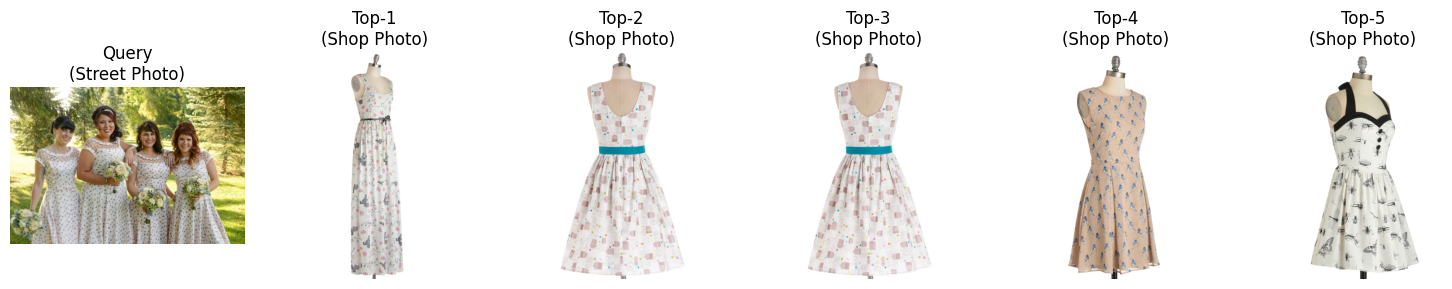

--------------------------------------------------------------------------------
14636 [771, 3430, 11580, 3067, 7827, 2065, 6198, 4446, 13255, 7366, 12367, 3663, 7565, 1743, 5039, 1166, 11905, 7132, 7509, 6312, 7117, 14748, 15566, 305, 2921, 14525, 4999, 13224, 6736, 14129, 11210, 11708, 506, 13222, 10175, 12315, 15653, 5057, 7525, 1757, 6440, 4977, 12847, 7721, 11410, 10153, 10367, 7599, 8218, 13833, 3670, 4541, 5465, 7092, 2207, 1180, 2708, 6304, 8728, 7656, 13534, 10421, 10844, 14376, 5877, 7228, 7001, 7355, 11264, 14385, 545, 11240, 7208, 4690, 4932, 11565, 5969, 5390, 10578, 9402, 12883, 11624, 1129, 511, 12988, 6005, 981, 1880, 5054, 796, 8009, 7916, 14947, 3055, 4290, 12069, 11328, 9103, 10598, 3866, 4730, 13681, 11828, 186, 15898, 13539, 8359, 1552, 12002, 14682, 14389, 8987, 439, 1413, 10543, 11214, 15257, 11327, 15179, 897, 12419, 2555, 1716, 4546, 962, 5115, 2902, 2477, 6280, 15093, 2476, 15246, 15487, 9595, 12504, 3394, 9622, 4811, 10128, 7784, 12458, 4811, 5083, 5083, 5419

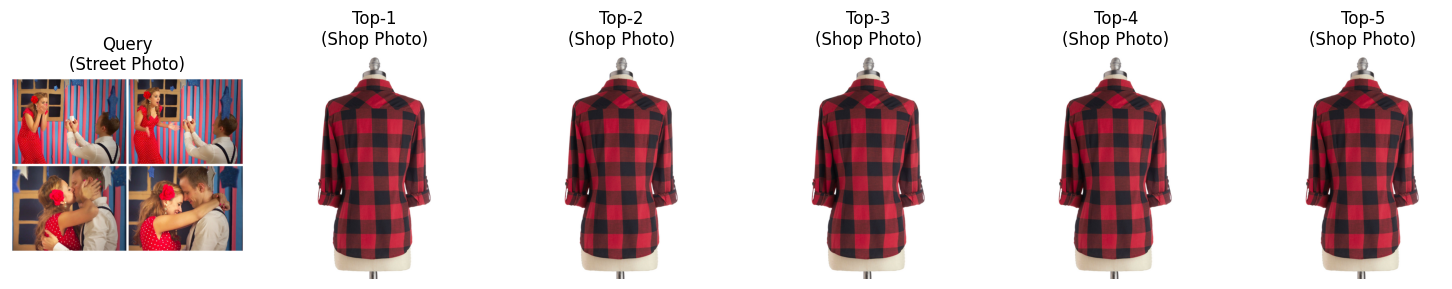

--------------------------------------------------------------------------------
5217 [7230, 12375, 6103, 11213, 4028, 16109, 8910, 15677, 3532, 7902, 15521, 4855, 11417, 7308, 2973, 11416, 141, 11734, 5053, 5758, 7543, 7902, 15123, 12386, 12144, 10900, 5758, 5053, 8910, 12989, 4102, 4028, 11213, 6103, 16109, 12375, 5535, 8637, 9210, 13575, 13968, 11991, 7552, 9341, 5561, 314, 9351, 5091, 15432, 5113, 14320, 14168, 8618, 9889, 8242, 7666, 8892, 5001, 4487, 15403]


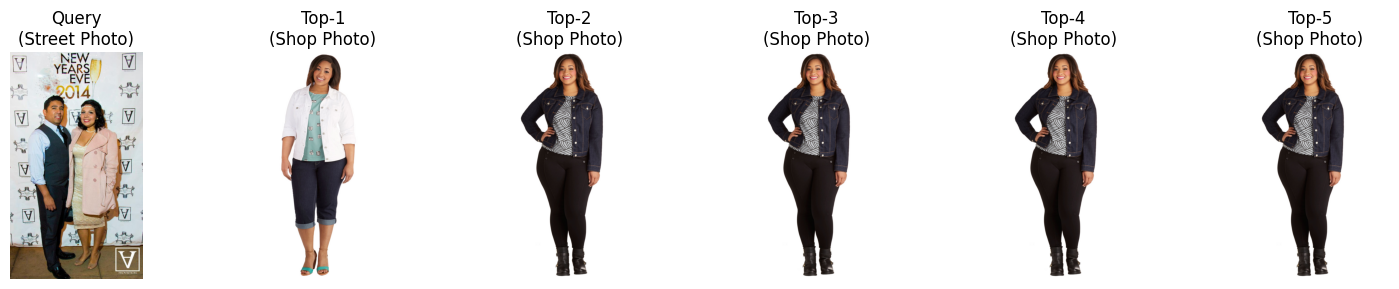

--------------------------------------------------------------------------------


In [37]:
print("Example retrievals from pipeline:")
for query_idx, retrieved_indices in pipeline_visualization_data[:3]:
    print(query_idx, retrieved_indices)
    plot_retrieval_results(test_dataset, query_idx, retrieved_indices)
    print("-" * 80)

{'top_1_accuracy': 0.0, 'top_3_accuracy': 0.0, 'top_5_accuracy': 0.0, 'top_10_accuracy': 0.0}
{'top_1_accuracy': 0.0, 'top_3_accuracy': 0.02, 'top_5_accuracy': 0.03, 'top_10_accuracy': 0.05}
{'top_1_accuracy': 0.0, 'top_3_accuracy': 0.01, 'top_5_accuracy': 0.03, 'top_10_accuracy': 0.06}


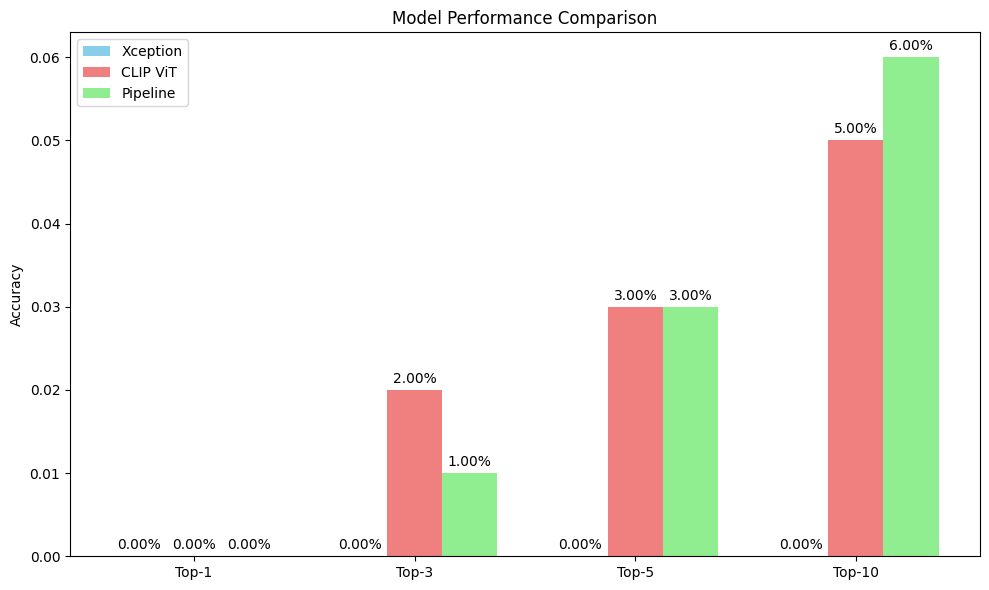

In [35]:
import matplotlib.pyplot as plt
import numpy as np

print(xception_accuracies)
print(clipvit_accuracies)
print(pipeline_accuracies)

# Extract accuracy values
metrics = ['top_1_accuracy', 'top_3_accuracy', 'top_5_accuracy', 'top_10_accuracy']
xception_values = [xception_accuracies[m] for m in metrics]
clipvit_values = [clipvit_accuracies[m] for m in metrics]
pipeline_values = [pipeline_accuracies[m] for m in metrics]

# Set up bar positions
x = np.arange(len(metrics))
width = 0.25  # Reduced width to fit 3 bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
rects1 = ax.bar(x - width, xception_values, width, label='Xception', color='skyblue')
rects2 = ax.bar(x, clipvit_values, width, label='CLIP ViT', color='lightcoral')
rects3 = ax.bar(x + width, pipeline_values, width, label='Pipeline', color='lightgreen')

# Customize plot
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['Top-1', 'Top-3', 'Top-5', 'Top-10'])
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

In [ ]:
del test_dataset